In [1]:
# Importar librerías necesarias
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import missingno as msno

In [2]:
pd.options.display.max_columns = None

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import os
print("Archivos en el directorio actual:")
print(os.listdir("."))

Archivos en el directorio actual:
['.config', 'drive', 'sample_data']


In [6]:
# Verificar qué archivos hay en el directorio actual
print("Archivos en el directorio actual:")
print(os.listdir("."))

# Verificar si el archivo específico existe
if os.path.exists('./drive/MyDrive/NoteFactoriaF5/all-states-history.csv'):
    print("✅ El archivo all-states-history.csv existe")
else:
    print("❌ El archivo all-states-history.csv NO existe")

Archivos en el directorio actual:
['.config', 'drive', 'sample_data']
✅ El archivo all-states-history.csv existe


In [7]:
# Cargar archivo CSV
df = pd.read_csv('./drive/MyDrive/NoteFactoriaF5/all-states-history.csv')

In [8]:
# Aseguramos que sea DataFrame
df = pd.DataFrame(df)

In [9]:
# Visualizar las primeras filas
df.head(5)

,date,state,death,deathConfirmed,deathIncrease,deathProbable,hospitalized,hospitalizedCumulative,hospitalizedCurrently,hospitalizedIncrease,inIcuCumulative,inIcuCurrently,negative,negativeIncrease,negativeTestsAntibody,negativeTestsPeopleAntibody,negativeTestsViral,onVentilatorCumulative,onVentilatorCurrently,positive,positiveCasesViral,positiveIncrease,positiveScore,positiveTestsAntibody,positiveTestsAntigen,positiveTestsPeopleAntibody,positiveTestsPeopleAntigen,positiveTestsViral,recovered,totalTestEncountersViral,totalTestEncountersViralIncrease,totalTestResults,totalTestResultsIncrease,totalTestsAntibody,totalTestsAntigen,totalTestsPeopleAntibody,totalTestsPeopleAntigen,totalTestsPeopleViral,totalTestsPeopleViralIncrease,totalTestsViral,totalTestsViralIncrease
0,2021-03-07,AK,305.0,NaN,0,NaN,1293.0,1293.0,33.0,0,NaN,NaN,NaN,0,NaN,NaN,1660758.0,NaN,2.0,56886.0,NaN,0,0,NaN,NaN,NaN,NaN,68693.0,NaN,NaN,0,1731628.0,0,NaN,NaN,NaN,NaN,NaN,0,1731628.0,0
1,2021-03-07,AL,10148.0,7963.0,-1,2185.0,45976.0,45976.0,494.0,0,2676.0,NaN,1931711.0,2087,NaN,NaN,NaN,1515.0,NaN,499819.0,392077.0,408,0,NaN,NaN,NaN,NaN,NaN,295690.0,NaN,0,2323788.0,2347,NaN,NaN,119757.0,NaN,2323788.0,2347,NaN,0
2,2021-03-07,AR,5319.0,4308.0,22,1011.0,14926.0,14926.0,335.0,11,NaN,141.0,2480716.0,3267,NaN,NaN,2480716.0,1533.0,65.0,324818.0,255726.0,165,0,NaN,NaN,NaN,81803.0,NaN,315517.0,NaN,0,2736442.0,3380,NaN,NaN,NaN,481311.0,NaN,0,2736442.0,3380
3,2021-03-07,AS,0.0,NaN,0,NaN,NaN,NaN,NaN,0,NaN,NaN,2140.0,0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2140.0,0,NaN,NaN,NaN,NaN,NaN,0,2140.0,0
4,2021-03-07,AZ,16328.0,14403.0,5,1925.0,57907.0,57907.0,963.0,44,NaN,273.0,3073010.0,13678,NaN,NaN,NaN,NaN,143.0,826454.0,769935.0,1335,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,7908105.0,45110,580569.0,NaN,444089.0,NaN,3842945.0,14856,7908105.0,45110


# Estadística descriptiva

In [10]:
# Verificar dimensiones del dataset
print(f"El dataset tiene {df.shape[0]} filas y {df.shape[1]} columnas")

El dataset tiene 20780 filas y 41 columnas


In [11]:
# Comprobamos el nombre de las columnas
df.columns

Index(['date', 'state', 'death', 'deathConfirmed', 'deathIncrease',
       'deathProbable', 'hospitalized', 'hospitalizedCumulative',
       'hospitalizedCurrently', 'hospitalizedIncrease', 'inIcuCumulative',
       'inIcuCurrently', 'negative', 'negativeIncrease',
       'negativeTestsAntibody', 'negativeTestsPeopleAntibody',
       'negativeTestsViral', 'onVentilatorCumulative', 'onVentilatorCurrently',
       'positive', 'positiveCasesViral', 'positiveIncrease', 'positiveScore',
       'positiveTestsAntibody', 'positiveTestsAntigen',
       'positiveTestsPeopleAntibody', 'positiveTestsPeopleAntigen',
       'positiveTestsViral', 'recovered', 'totalTestEncountersViral',
       'totalTestEncountersViralIncrease', 'totalTestResults',
       'totalTestResultsIncrease', 'totalTestsAntibody', 'totalTestsAntigen',
       'totalTestsPeopleAntibody', 'totalTestsPeopleAntigen',
       'totalTestsPeopleViral', 'totalTestsPeopleViralIncrease',
       'totalTestsViral', 'totalTestsViralIncrease'

In [12]:
# Seleccionamos 5 filas al azar para ver los datos
df.sample(5)

,date,state,death,deathConfirmed,deathIncrease,deathProbable,hospitalized,hospitalizedCumulative,hospitalizedCurrently,hospitalizedIncrease,inIcuCumulative,inIcuCurrently,negative,negativeIncrease,negativeTestsAntibody,negativeTestsPeopleAntibody,negativeTestsViral,onVentilatorCumulative,onVentilatorCurrently,positive,positiveCasesViral,positiveIncrease,positiveScore,positiveTestsAntibody,positiveTestsAntigen,positiveTestsPeopleAntibody,positiveTestsPeopleAntigen,positiveTestsViral,recovered,totalTestEncountersViral,totalTestEncountersViralIncrease,totalTestResults,totalTestResultsIncrease,totalTestsAntibody,totalTestsAntigen,totalTestsPeopleAntibody,totalTestsPeopleAntigen,totalTestsPeopleViral,totalTestsPeopleViralIncrease,totalTestsViral,totalTestsViralIncrease
13070,2020-07-17,MD,3359.0,3227.0,12,132.0,11728.0,11728.0,434.0,41,NaN,128.0,631845.0,14980,NaN,NaN,NaN,NaN,NaN,76371.0,76371.0,707,0,NaN,NaN,NaN,NaN,89541.0,5286.0,NaN,0,891359.0,24171,NaN,NaN,NaN,NaN,708216.0,15687,891359.0,24171
14992,2020-06-13,OR,173.0,NaN,2,NaN,875.0,875.0,133.0,11,NaN,47.0,160812.0,4245,NaN,NaN,230670.0,NaN,15.0,5377.0,NaN,140,0,NaN,NaN,NaN,NaN,13569.0,2370.0,NaN,0,244239.0,6880,NaN,NaN,NaN,NaN,166019.0,4376,244239.0,6880
11583,2020-08-13,TX,9289.0,NaN,255,NaN,NaN,NaN,6879.0,0,NaN,2435.0,NaN,0,NaN,NaN,NaN,NaN,NaN,513575.0,513575.0,6755,0,20800.0,10700.0,NaN,NaN,685342.0,375760.0,NaN,0,4842489.0,39346,302012.0,73513.0,NaN,NaN,NaN,0,4842489.0,39346
10061,2020-09-09,NY,25370.0,NaN,3,NaN,NaN,NaN,463.0,0,NaN,121.0,NaN,0,NaN,NaN,NaN,NaN,59.0,441154.0,NaN,576,0,NaN,NaN,NaN,NaN,NaN,NaN,8976165.0,63230,8976165.0,63230,NaN,NaN,NaN,NaN,NaN,0,NaN,0
10148,2020-09-07,GU,18.0,NaN,2,NaN,NaN,NaN,57.0,0,NaN,14.0,39070.0,0,NaN,NaN,NaN,NaN,NaN,1671.0,1671.0,0,0,2.0,NaN,NaN,NaN,NaN,744.0,NaN,0,40741.0,0,158.0,NaN,NaN,NaN,NaN,0,40110.0,0


In [13]:
# Información general del dataset
# Tipos de datos, nulos, uso de memoria
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20780 entries, 0 to 20779
Data columns (total 41 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   date                              20780 non-null  object 
 1   state                             20780 non-null  object 
 2   death                             19930 non-null  float64
 3   deathConfirmed                    9422 non-null   float64
 4   deathIncrease                     20780 non-null  int64  
 5   deathProbable                     7593 non-null   float64
 6   hospitalized                      12382 non-null  float64
 7   hospitalizedCumulative            12382 non-null  float64
 8   hospitalizedCurrently             17339 non-null  float64
 9   hospitalizedIncrease              20780 non-null  int64  
 10  inIcuCumulative                   3789 non-null   float64
 11  inIcuCurrently                    11636 non-null  float64
 12  nega

In [14]:
# Contamos valores no nulos por columna
df.count()

,0
date,20780
state,20780
death,19930
deathConfirmed,9422
deathIncrease,20780
deathProbable,7593
hospitalized,12382
hospitalizedCumulative,12382
hospitalizedCurrently,17339
hospitalizedIncrease,20780


In [15]:
# Estadísticas descriptivas de las columnas numéricas
df.describe()

,death,deathConfirmed,deathIncrease,deathProbable,hospitalized,hospitalizedCumulative,hospitalizedCurrently,hospitalizedIncrease,inIcuCumulative,inIcuCurrently,negative,negativeIncrease,negativeTestsAntibody,negativeTestsPeopleAntibody,negativeTestsViral,onVentilatorCumulative,onVentilatorCurrently,positive,positiveCasesViral,positiveIncrease,positiveScore,positiveTestsAntibody,positiveTestsAntigen,positiveTestsPeopleAntibody,positiveTestsPeopleAntigen,positiveTestsViral,recovered,totalTestEncountersViral,totalTestEncountersViralIncrease,totalTestResults,totalTestResultsIncrease,totalTestsAntibody,totalTestsAntigen,totalTestsPeopleAntibody,totalTestsPeopleAntigen,totalTestsPeopleViral,totalTestsPeopleViralIncrease,totalTestsViral,totalTestsViralIncrease
count,19930.000000,9422.000000,20780.000000,7593.000000,12382.000000,12382.000000,17339.000000,20780.000000,3789.000000,11636.000000,1.329000e+04,20780.000000,1458.000000,972.000000,5.024000e+03,1290.000000,9126.000000,2.059200e+04,1.424600e+04,20780.000000,20780.0,3346.000000,2233.000000,1094.000000,633.000000,8.958000e+03,1.200300e+04,5.231000e+03,20780.000000,2.061400e+04,20780.000000,4.789000e+03,3.421000e+03,2200.000000,999.000000,9.197000e+03,2.078000e+04,1.451600e+04,2.078000e+04
mean,3682.216859,3770.182764,24.790712,417.291321,9262.762478,9262.762478,1190.576965,37.360780,1934.191607,359.621176,8.482246e+05,3589.128874,145580.733196,188710.969136,1.818574e+06,574.659690,151.589305,1.651560e+05,1.786625e+05,1383.849519,0.0,19811.346683,31837.241379,20516.966179,25259.048973,1.985001e+05,9.424223e+04,2.702109e+06,5578.147064,2.186936e+06,17508.388210,1.634028e+05,3.089196e+05,165431.783182,168188.246246,9.650105e+05,2.739554e+03,2.304555e+06,1.296143e+04
std,6281.366321,4157.640633,60.162742,537.625982,12620.544081,12620.544081,2060.041207,208.237151,1953.329983,594.831150,1.344501e+06,11577.190442,190042.827960,200218.073746,2.495555e+06,434.603472,207.755157,3.267852e+05,3.350851e+05,3023.558742,0.0,28745.649916,41929.658070,29267.559775,24139.253458,3.514995e+05,2.110372e+05,5.070893e+06,21253.609858,4.436508e+06,33586.022461,2.016978e+05,4.232854e+05,178181.836898,143748.073365,1.415215e+06,1.621900e+04,4.445365e+06,3.749509e+04
min,0.000000,0.000000,-201.000000,0.000000,1.000000,1.000000,0.000000,-12257.000000,6.000000,0.000000,0.000000e+00,-968686.000000,587.000000,1.000000,1.000000e+00,32.000000,0.000000,0.000000e+00,0.000000e+00,-7757.000000,0.0,0.000000,0.000000,0.000000,3.000000,0.000000e+00,2.000000e+00,0.000000e+00,-16946.000000,0.000000e+00,-130545.000000,0.000000e+00,1.000000e+00,1.000000,3.000000,0.000000e+00,-1.043744e+06,0.000000e+00,-1.154583e+06
25%,161.250000,607.000000,0.000000,79.000000,985.250000,985.250000,166.500000,0.000000,501.000000,60.000000,5.394125e+04,0.000000,11242.000000,54874.000000,3.032998e+05,220.250000,29.000000,5.753750e+03,1.037575e+04,65.000000,0.0,852.000000,1085.000000,3155.500000,2682.000000,1.615925e+04,3.379000e+03,1.937935e+05,0.000000,1.040498e+05,1205.750000,1.896500e+04,2.004700e+04,54912.750000,37675.500000,1.414700e+05,0.000000e+00,1.324600e+05,0.000000e+00
50%,1108.000000,2409.500000,6.000000,216.000000,4472.000000,4472.000000,531.000000,0.000000,1295.000000,172.000000,3.059720e+05,141.500000,78888.000000,100282.000000,9.365995e+05,412.000000,86.000000,4.606450e+04,6.844150e+04,435.000000,0.0,8624.000000,13661.000000,11956.000000,17763.000000,6.535900e+04,1.761800e+04,9.053220e+05,0.000000,6.552670e+05,6125.000000,8.465200e+04,1.233840e+05,103967.500000,144130.000000,4.193720e+05,0.000000e+00,7.316510e+05,1.896500e+03
75%,4387.500000,5462.000000,24.000000,460.000000,12248.500000,12248.500000,1279.000000,36.000000,2451.000000,380.000000,1.056611e+06,3916.000000,162925.500000,261121.000000,2.316865e+06,818.000000,185.000000,1.779580e+05,2.024250e+05,1335.250000,0.0,25899.750000,49010.000000,19059.000000,47012.000000,2.246800e+05,9.315250e+04,2.780542e+06,0.000000,2.264766e+06,19086.500000,2.300110e+05,4.327270e+05,18310

In [16]:
# Buscamos duplicados
df.duplicated().sum()

np.int64(0)

# ¿Hay valores nulos?

In [17]:
# Contamos nulos por columna, ordenados de mayor a menor
df.isna().sum().sort_values(ascending=False)

,0
positiveTestsPeopleAntigen,20147
negativeTestsPeopleAntibody,19808
totalTestsPeopleAntigen,19781
positiveTestsPeopleAntibody,19686
onVentilatorCumulative,19490
negativeTestsAntibody,19322
totalTestsPeopleAntibody,18580
positiveTestsAntigen,18547
positiveTestsAntibody,17434
totalTestsAntigen,17359


# ¿Son más del 25%?

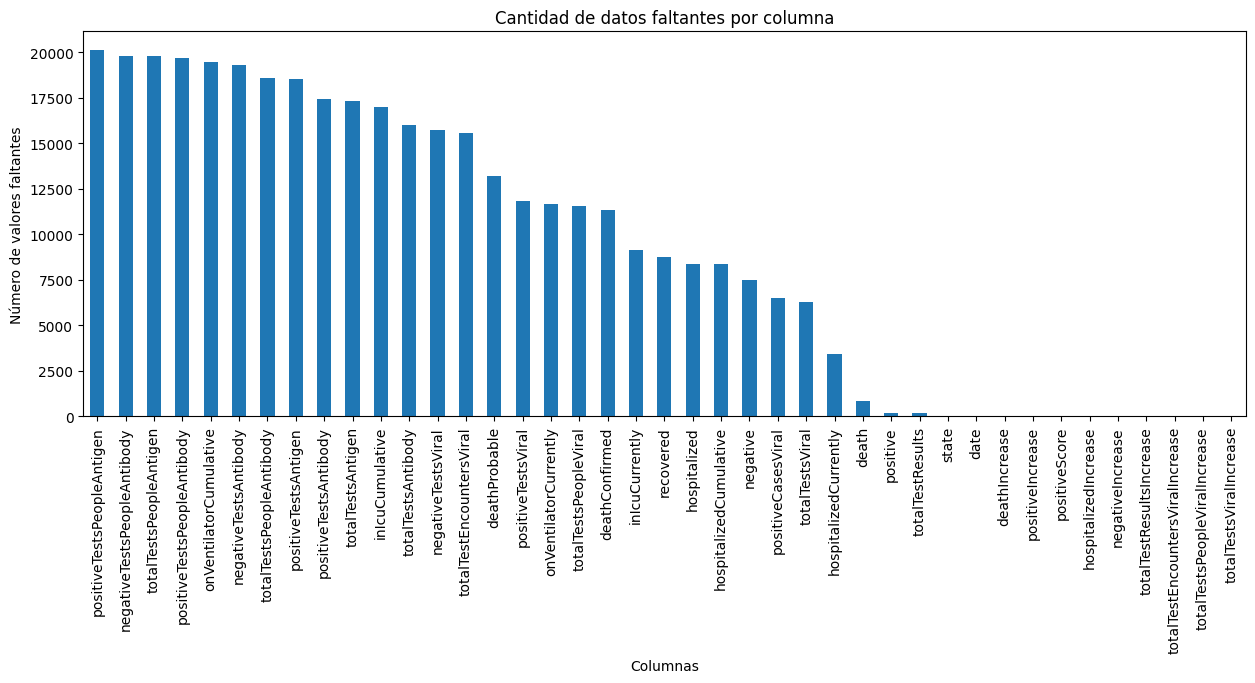

In [18]:
# Verifico si los nulos superan el 25%

# Primero miro el número total por columna de datos
missing = df.isna().sum().sort_values(ascending=False)

plt.figure(figsize=(15,5))
missing.plot(kind='bar')
plt.title("Cantidad de datos faltantes por columna")
plt.ylabel("Número de valores faltantes")
plt.xlabel("Columnas")
plt.show()

In [19]:
# calcular % de nulos
missing_pct = (df.isna().mean() * 100).sort_values(ascending=False)
print(missing_pct)

positiveTestsPeopleAntigen          96.953802
negativeTestsPeopleAntibody         95.322425
totalTestsPeopleAntigen             95.192493
positiveTestsPeopleAntibody         94.735322
onVentilatorCumulative              93.792108
negativeTestsAntibody               92.983638
totalTestsPeopleAntibody            89.412897
positiveTestsAntigen                89.254090
positiveTestsAntibody               83.897979
totalTestsAntigen                   83.537055
inIcuCumulative                     81.766121
totalTestsAntibody                  76.953802
negativeTestsViral                  75.822907
totalTestEncountersViral            74.826756
deathProbable                       63.460058
positiveTestsViral                  56.891242
onVentilatorCurrently               56.082772
totalTestsPeopleViral               55.741097
deathConfirmed                      54.658325
inIcuCurrently                      44.003850
recovered                           42.237729
hospitalized                      

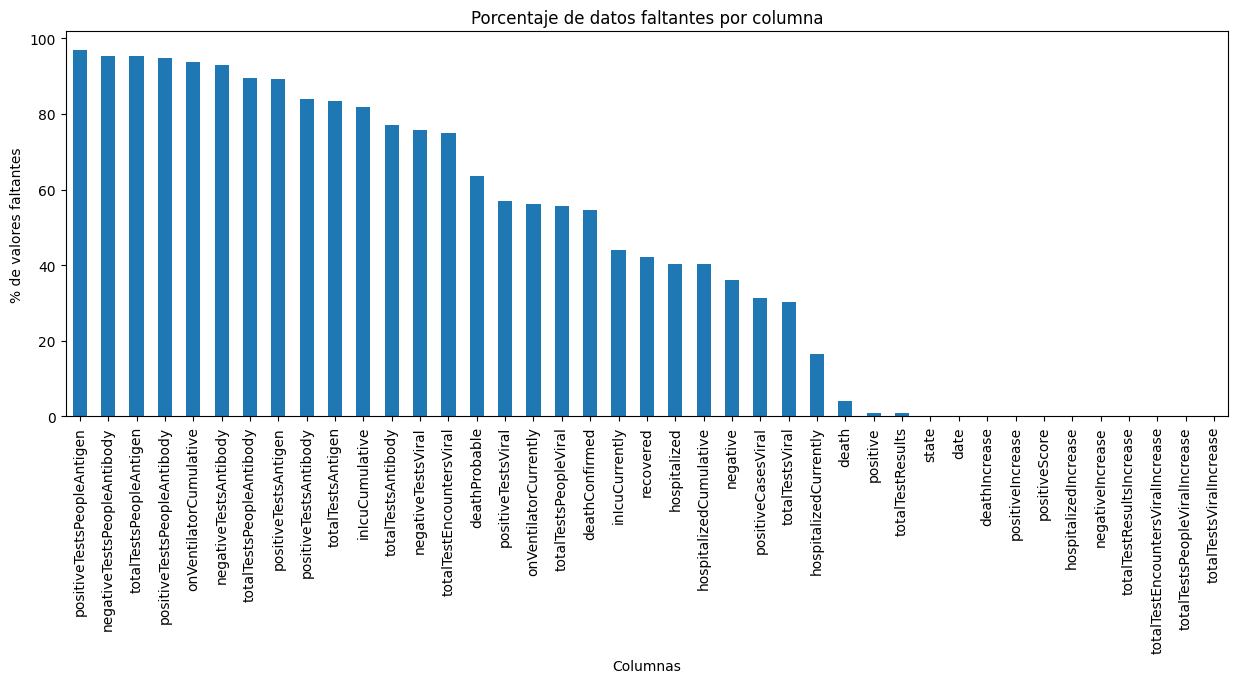

In [20]:
# Gráfico de barras con % de nulos
missing_pct = (df.isna().mean() * 100).sort_values(ascending=False)

plt.figure(figsize=(15,5))
missing_pct.plot(kind='bar')
plt.title("Porcentaje de datos faltantes por columna")
plt.ylabel("% de valores faltantes")
plt.xlabel("Columnas")
plt.show()

<Axes: >

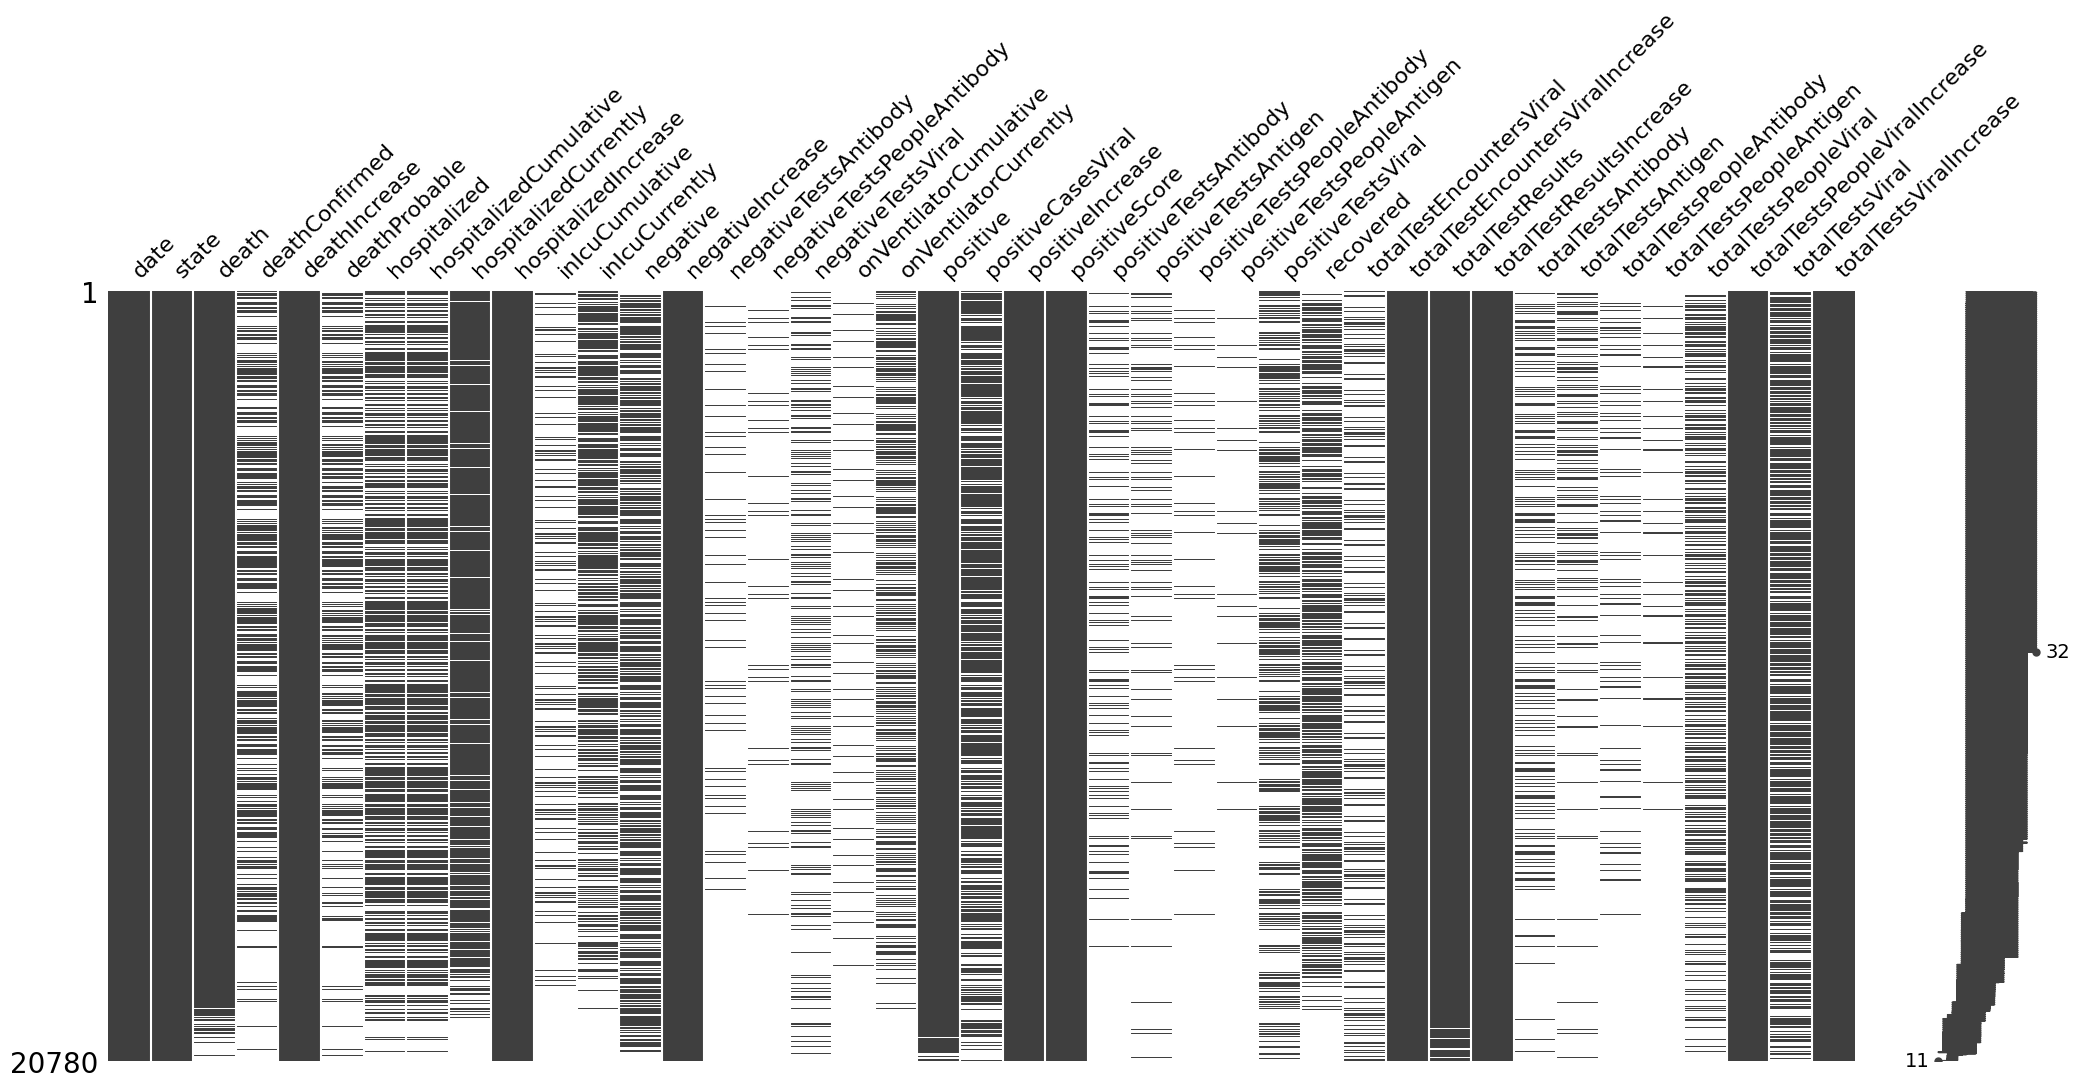

In [21]:
# Otra forma de verlo
msno.matrix(df)

<Axes: >

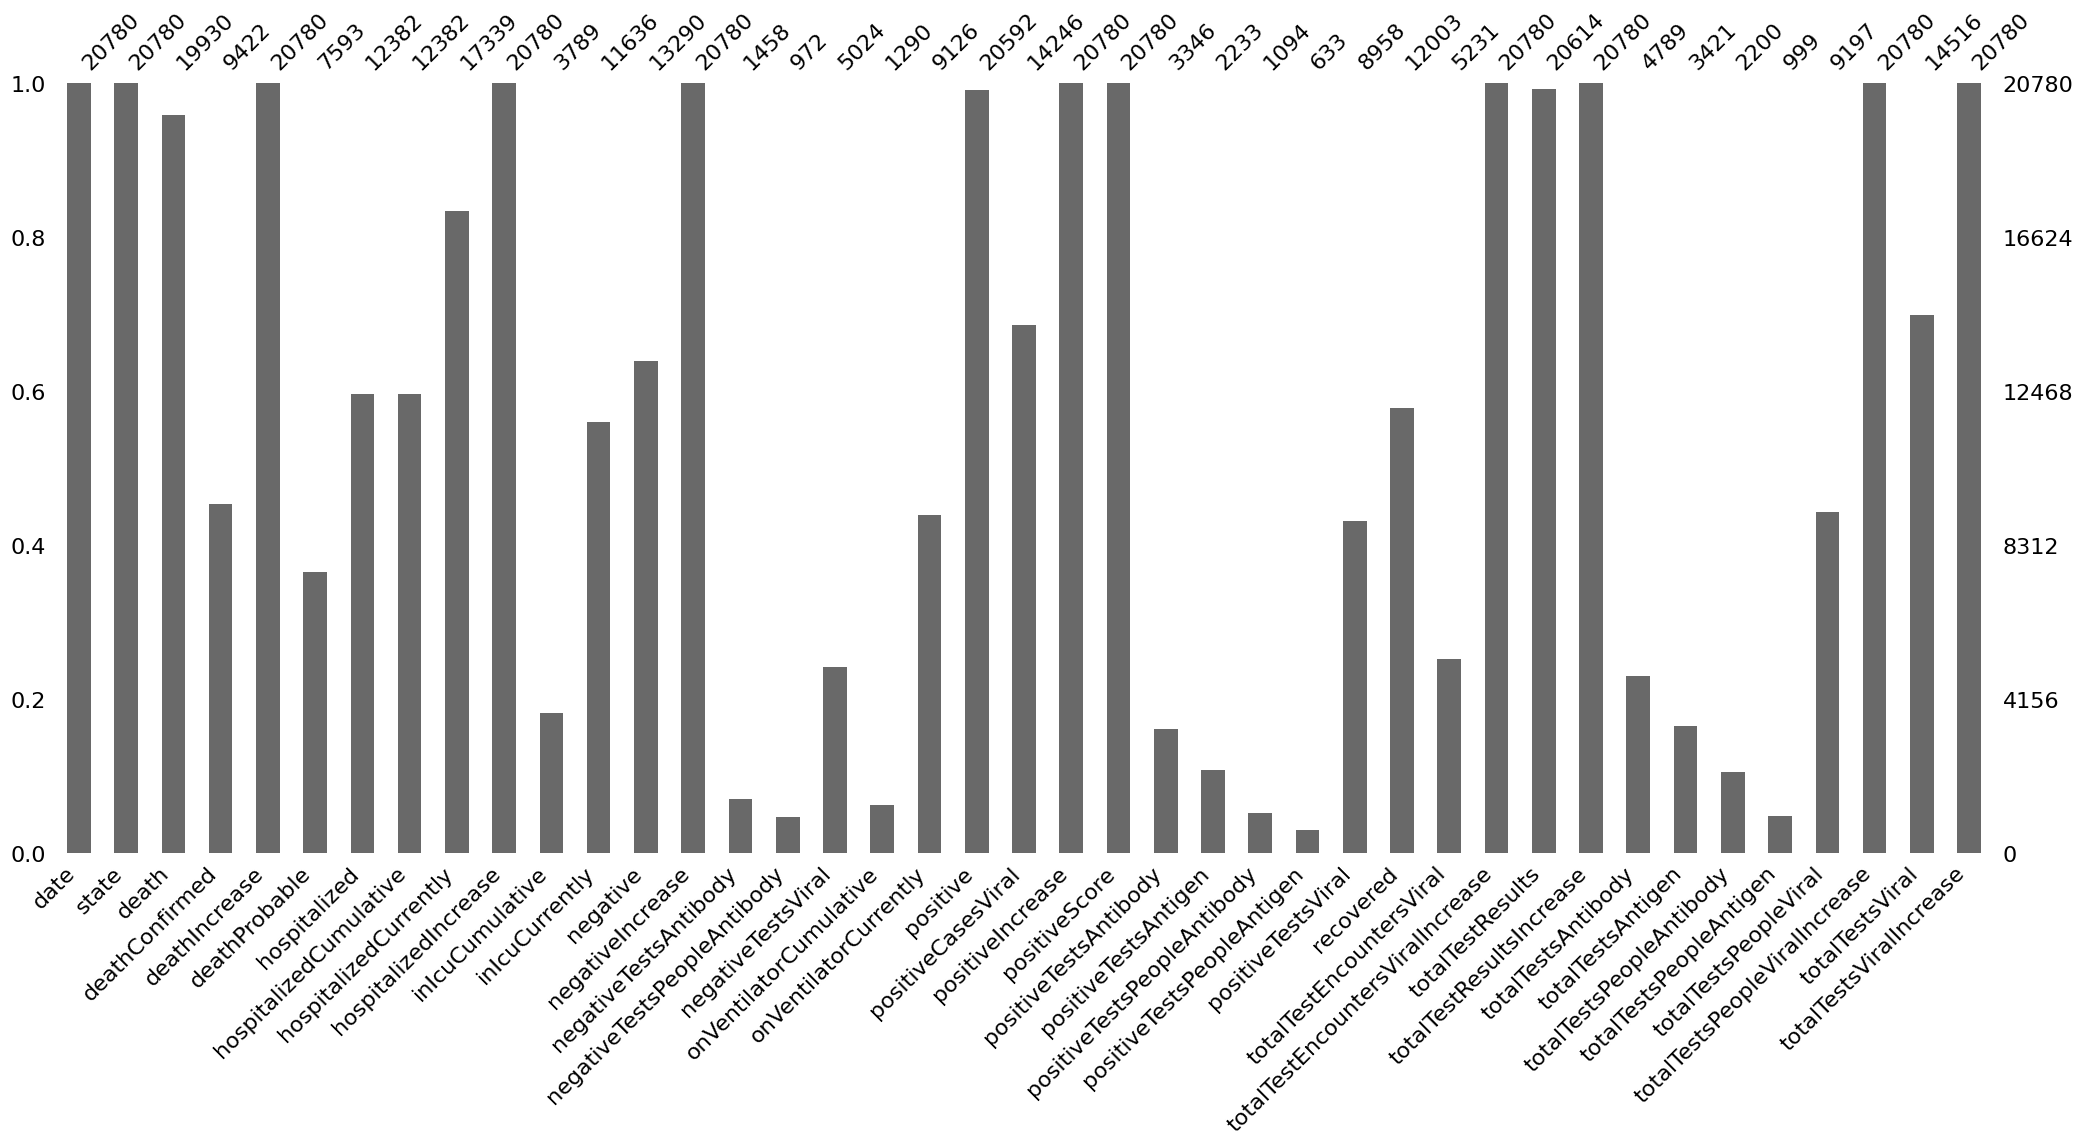

In [22]:
# Otra forma más de verlo
msno.bar(df)

# Creo una copia del dataset original para aplicarle cambios importantes como borrar columnas, cambiar tipos de datos, etc.

## Descarto las columnas que creo NO aportan mucha información o información de valor, en este caso descarto las siguientes columnas:

#### *deathConfirmed, deathProbable, hospitalized, hospitalizedCumulative, inIcuCumulative, inIcuCurrently, negativeTestsAntibody, negativeTestsPeopleAntibody, negativeTestsViral, onVentilatorCumulative, onVentilatorCurrently, positiveTestsAntibody, positiveTestsAntigen, positiveTestsPeopleAntibody, positiveTestsPeopleAntigen, positiveTestsViral, totalTestEncountersViral, totalTestsAntibody, totalTestsAntigen, totalTestsPeopleAntibody, totalTestsPeopleAntigen y totalTestsPeopleViral* **porque tienen > 25% de valores nulos.**

#### Descarto la columna *positiveScore* porque todos sus valores son 0 y no aporta nada.

#### Descarto las columnas *totalTestEncountersViralIncrease* porque *totalTestEncountersViral* está descartada y la columna *totalTestsPeopleViralIncrease* porque *totalTestsPeopleViral* está descartada.

#### Aunque las columnas *hospitalizedCurrently, negative, recovered y totalTestsViral* tienen más de 25% de valores nulos o están cerca las mantengo porque las considero importantes para el informe ejecutivo que haré después.

In [23]:
# Selecciono las columnas con las que voy a trabajar
df_resumen = df[["date","state","death","deathIncrease","hospitalizedCurrently","hospitalizedIncrease","negative","negativeIncrease",
                 "positive","positiveIncrease","recovered","totalTestResults","totalTestResultsIncrease","totalTestsViral","totalTestsViralIncrease"]].copy()

# Vemos que ahora tenemos 15 columnas y no 41

In [24]:
df_resumen.shape

(20780, 15)

In [25]:
df_resumen.head(5)

,date,state,death,deathIncrease,hospitalizedCurrently,hospitalizedIncrease,negative,negativeIncrease,positive,positiveIncrease,recovered,totalTestResults,totalTestResultsIncrease,totalTestsViral,totalTestsViralIncrease
0,2021-03-07,AK,305.0,0,33.0,0,NaN,0,56886.0,0,NaN,1731628.0,0,1731628.0,0
1,2021-03-07,AL,10148.0,-1,494.0,0,1931711.0,2087,499819.0,408,295690.0,2323788.0,2347,NaN,0
2,2021-03-07,AR,5319.0,22,335.0,11,2480716.0,3267,324818.0,165,315517.0,2736442.0,3380,2736442.0,3380
3,2021-03-07,AS,0.0,0,NaN,0,2140.0,0,0.0,0,NaN,2140.0,0,2140.0,0
4,2021-03-07,AZ,16328.0,5,963.0,44,3073010.0,13678,826454.0,1335,NaN,7908105.0,45110,7908105.0,45110


In [26]:
# Reviso los tipos de los datos para ver cuales debo transformar para trabajar mejor
df_resumen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20780 entries, 0 to 20779
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   date                      20780 non-null  object 
 1   state                     20780 non-null  object 
 2   death                     19930 non-null  float64
 3   deathIncrease             20780 non-null  int64  
 4   hospitalizedCurrently     17339 non-null  float64
 5   hospitalizedIncrease      20780 non-null  int64  
 6   negative                  13290 non-null  float64
 7   negativeIncrease          20780 non-null  int64  
 8   positive                  20592 non-null  float64
 9   positiveIncrease          20780 non-null  int64  
 10  recovered                 12003 non-null  float64
 11  totalTestResults          20614 non-null  float64
 12  totalTestResultsIncrease  20780 non-null  int64  
 13  totalTestsViral           14516 non-null  float64
 14  totalT

In [27]:
# Convertir columna date a datetime
df_resumen['date'] = pd.to_datetime(df_resumen['date'])
# Creo la columna year
df_resumen['year'] = df_resumen['date'].dt.year
# Creo las columnas month y monthName
df_resumen['monthName'] = df_resumen['date'].dt.month_name()
df_resumen['month'] = df_resumen['date'].dt.month

In [28]:
# Compruebo las columnas recien creadas
df_resumen[['date', 'year', 'monthName', 'month']].sample(10)

,date,year,monthName,month
14241,2020-06-26,2020,June,6
8593,2020-10-05,2020,October,10
16433,2020-05-18,2020,May,5
8855,2020-09-30,2020,September,9
5144,2020-12-06,2020,December,12
15749,2020-05-30,2020,May,5
5391,2020-12-01,2020,December,12
7175,2020-10-30,2020,October,10
17636,2020-04-27,2020,April,4
6471,2020-11-12,2020,November,11


In [29]:
# Compruebo el tipo de la columna date
print(df_resumen['date'].dtype)

datetime64[ns]


In [30]:
# Convierto a string las columnas state y monthName de tipo Object
for col in df_resumen.columns:
    if df_resumen[col].dtype == 'object':
        df_resumen[col] = df_resumen[col].astype('string')

In [31]:
# Compruebo el cambio de tipo de dato
df_resumen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20780 entries, 0 to 20779
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   date                      20780 non-null  datetime64[ns]
 1   state                     20780 non-null  string        
 2   death                     19930 non-null  float64       
 3   deathIncrease             20780 non-null  int64         
 4   hospitalizedCurrently     17339 non-null  float64       
 5   hospitalizedIncrease      20780 non-null  int64         
 6   negative                  13290 non-null  float64       
 7   negativeIncrease          20780 non-null  int64         
 8   positive                  20592 non-null  float64       
 9   positiveIncrease          20780 non-null  int64         
 10  recovered                 12003 non-null  float64       
 11  totalTestResults          20614 non-null  float64       
 12  totalTestResultsIn

#### Creo un diccionario de nombres de estados y nivel de riqueza para visualizar mejor los datos que con códigos de 2 letras.
#### El nivel lo usare para ver gráficos por nivel de riqueza 

In [32]:
# Creo el diccionario

estados_usa = {
    "AL": {"nombre": "Alabama", "nivel": "Pobre"},
    "AK": {"nombre": "Alaska", "nivel": "Rico"},
    "AZ": {"nombre": "Arizona", "nivel": "Medio"},
    "AR": {"nombre": "Arkansas", "nivel": "Pobre"},
    "CA": {"nombre": "California", "nivel": "Rico"},
    "CO": {"nombre": "Colorado", "nivel": "Rico"},
    "CT": {"nombre": "Connecticut", "nivel": "Rico"},
    "DE": {"nombre": "Delaware", "nivel": "Medio"},
    "FL": {"nombre": "Florida", "nivel": "Medio"},
    "GA": {"nombre": "Georgia", "nivel": "Medio"},
    "HI": {"nombre": "Hawái", "nivel": "Rico"},
    "ID": {"nombre": "Idaho", "nivel": "Medio"},
    "IL": {"nombre": "Illinois", "nivel": "Medio"},
    "IN": {"nombre": "Indiana", "nivel": "Medio"},
    "IA": {"nombre": "Iowa", "nivel": "Medio"},
    "KS": {"nombre": "Kansas", "nivel": "Medio"},
    "KY": {"nombre": "Kentucky", "nivel": "Pobre"},
    "LA": {"nombre": "Luisiana", "nivel": "Pobre"},
    "ME": {"nombre": "Maine", "nivel": "Medio"},
    "MD": {"nombre": "Maryland", "nivel": "Rico"},
    "MA": {"nombre": "Massachusetts", "nivel": "Rico"},
    "MI": {"nombre": "Michigan", "nivel": "Medio"},
    "MN": {"nombre": "Minnesota", "nivel": "Rico"},
    "MS": {"nombre": "Misisipi", "nivel": "Pobre"},
    "MO": {"nombre": "Misuri", "nivel": "Medio"},
    "MT": {"nombre": "Montana", "nivel": "Medio"},
    "NE": {"nombre": "Nebraska", "nivel": "Medio"},
    "NV": {"nombre": "Nevada", "nivel": "Medio"},
    "NH": {"nombre": "Nuevo Hampshire", "nivel": "Rico"},
    "NJ": {"nombre": "Nueva Jersey", "nivel": "Rico"},
    "NM": {"nombre": "Nuevo México", "nivel": "Pobre"},
    "NY": {"nombre": "Nueva York", "nivel": "Rico"},
    "NC": {"nombre": "Carolina del Norte", "nivel": "Medio"},
    "ND": {"nombre": "Dakota del Norte", "nivel": "Medio"},
    "OH": {"nombre": "Ohio", "nivel": "Medio"},
    "OK": {"nombre": "Oklahoma", "nivel": "Pobre"},
    "OR": {"nombre": "Oregón", "nivel": "Medio"},
    "PA": {"nombre": "Pensilvania", "nivel": "Medio"},
    "RI": {"nombre": "Rhode Island", "nivel": "Medio"},
    "SC": {"nombre": "Carolina del Sur", "nivel": "Pobre"},
    "SD": {"nombre": "Dakota del Sur", "nivel": "Medio"},
    "TN": {"nombre": "Tennessee", "nivel": "Medio"},
    "TX": {"nombre": "Texas", "nivel": "Medio"},
    "UT": {"nombre": "Utah", "nivel": "Rico"},
    "VT": {"nombre": "Vermont", "nivel": "Medio"},
    "VA": {"nombre": "Virginia", "nivel": "Rico"},
    "WA": {"nombre": "Washington", "nivel": "Rico"},
    "WV": {"nombre": "Virginia Occidental", "nivel": "Pobre"},
    "WI": {"nombre": "Wisconsin", "nivel": "Medio"},
    "WY": {"nombre": "Wyoming", "nivel": "Medio"},
    "DC": {"nombre": "Columbia", "nivel": "Rico"},
    "GU": {"nombre": "Guam", "nivel": "Medio"},
    "MP": {"nombre": "Islas Marianas", "nivel": "Medio"},
    "PR": {"nombre": "Puerto Rico", "nivel": "Pobre"},
    "VI": {"nombre": "Islas Virgenes", "nivel": "Rico"},
    "AS": {"nombre": "Samoa Americana", "nivel": "Pobre"}
}

# Ejemplo: consultar nivel de Texas por su sigla
print(estados_usa["TX"]["nivel"]) # Salida: Medio

Medio


### Introduzco las columnas *stateName* con el nombre del estado y *stateLevel* con el nivel de riqueza

In [33]:
def level(state):
    if estados_usa[state]: return estados_usa[state]['nivel']
    else: return 'Sin Level'

def name(state):
    #if state == 'AK': return 'Arkansas'
    if estados_usa[state]: return estados_usa[state]['nombre']
    else: return 'Sin Estado'

df_resumen['stateName'] = df_resumen['state'].apply(name)
df_resumen['stateLevel'] = df_resumen['state'].apply(level)

In [34]:
# Compruebo las columnas recien creadas
df_resumen[['state', 'stateName', 'stateLevel']].head(10)

,state,stateName,stateLevel
0,AK,Alaska,Rico
1,AL,Alabama,Pobre
2,AR,Arkansas,Pobre
3,AS,Samoa Americana,Pobre
4,AZ,Arizona,Medio
5,CA,California,Rico
6,CO,Colorado,Rico
7,CT,Connecticut,Rico
8,DC,Columbia,Rico
9,DE,Delaware,Medio


In [35]:
# Convierto a string las columnas stateName y stateLevel de tipo Object
for col in df_resumen.columns:
    if df_resumen[col].dtype == 'object':
        df_resumen[col] = df_resumen[col].astype('string')

# Verificamos finalmente el tipo de datos de las columnas

In [36]:
df_resumen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20780 entries, 0 to 20779
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   date                      20780 non-null  datetime64[ns]
 1   state                     20780 non-null  string        
 2   death                     19930 non-null  float64       
 3   deathIncrease             20780 non-null  int64         
 4   hospitalizedCurrently     17339 non-null  float64       
 5   hospitalizedIncrease      20780 non-null  int64         
 6   negative                  13290 non-null  float64       
 7   negativeIncrease          20780 non-null  int64         
 8   positive                  20592 non-null  float64       
 9   positiveIncrease          20780 non-null  int64         
 10  recovered                 12003 non-null  float64       
 11  totalTestResults          20614 non-null  float64       
 12  totalTestResultsIn

### Poner los NaN a cero. Considero que los datos NaN significa que no hay casos y no han introducido datos.

In [37]:
df_resumen.fillna(0, inplace=True)

# Visualización de Datos

In [38]:
df_resumen.sample(10)

,date,state,death,deathIncrease,hospitalizedCurrently,hospitalizedIncrease,negative,negativeIncrease,positive,positiveIncrease,recovered,totalTestResults,totalTestResultsIncrease,totalTestsViral,totalTestsViralIncrease,year,monthName,month,stateName,stateLevel
10391,2020-09-03,ND,154.0,2,51.0,8,193270.0,1440,12606.0,359,10051.0,470423.0,6312,486081.0,6544,2020,September,9,Dakota del Norte,Medio
10131,2020-09-08,VT,58.0,0,4.0,0,143437.0,672,1652.0,2,1465.0,211500.0,1013,211500.0,1013,2020,September,9,Vermont,Medio
13978,2020-07-01,NJ,14987.0,43,1080.0,207,1271009.0,20302,172936.0,299,0.0,1443945.0,20601,1442937.0,20563,2020,July,7,Nueva Jersey,Rico
788,2021-02-21,AZ,15505.0,25,1598.0,74,2940237.0,9077,807967.0,1804,0.0,7433448.0,37120,7433448.0,37120,2021,February,2,Arizona,Medio
1887,2021-02-02,OK,3602.0,38,1123.0,39,2822470.0,27129,392164.0,1296,360702.0,3214634.0,28425,3195609.0,29609,2021,February,2,Oklahoma,Pobre
12934,2020-07-20,WV,100.0,0,77.0,0,0.0,0,5142.0,100,3466.0,231289.0,3868,231289.0,3868,2020,July,7,Virginia Occidental,Pobre
6263,2020-11-16,TX,19579.0,20,7468.0,0,0.0,0,1116230.0,7828,875521.0,9713014.0,38343,9713014.0,38343,2020,November,11,Texas,Medio
18555,2020-04-10,KY,90.0,17,271.0,459,0.0,0,1693.0,347,464.0,24288.0,2487,24288.0,2487,2020,April,4,Kentucky,Pobre
16235,2020-05-22,VT,54.0,0,16.0,0,24864.0,1676,952.0,2,834.0,30046.0,825,30046.0,825,2020,May,5,Vermont,Medio
18573,2020-04-10,NY,7844.0,777,18569.0,0,0.0,0,170512.0,10575,0.0,417885.0,26336,0.0,0,2020,April,4,Nueva York,Rico


# 💡 Histograma

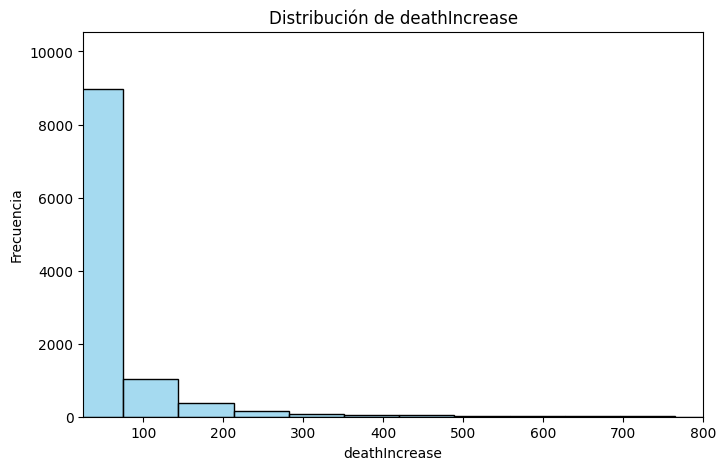

In [72]:
plt.figure(figsize=(8,5))
sns.histplot(df_resumen['deathIncrease'], bins=40, kde=False, color='skyblue')
plt.title("Distribución de deathIncrease")
plt.xlabel("deathIncrease")
plt.ylabel("Frecuencia")
plt.xlim(25, 800)
plt.show()
# Hay casi 8500 lineas con entre 0 y 70 muertes diarias

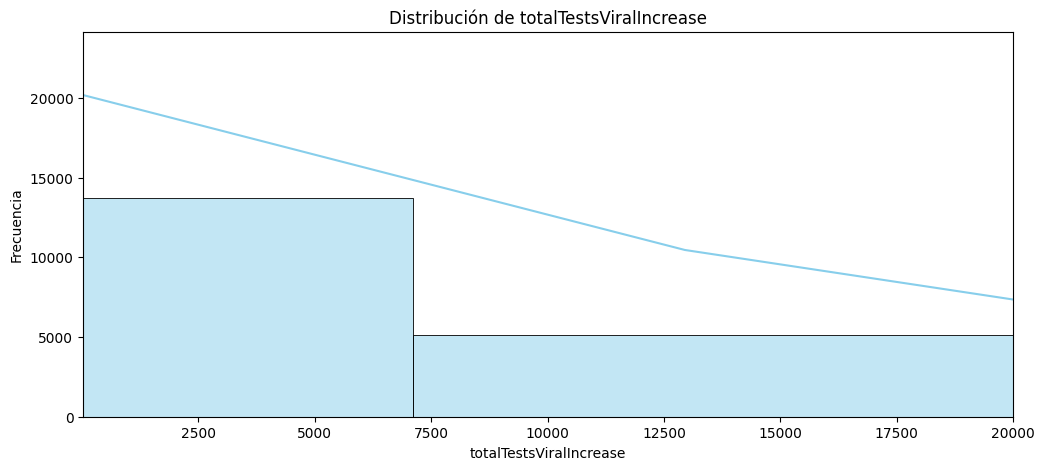

In [74]:
plt.figure(figsize=(12,5))
sns.histplot(df_resumen['totalTestsViralIncrease'], bins=100, kde=True, color='skyblue')
plt.title("Distribución de totalTestsViralIncrease")
plt.xlabel("totalTestsViralIncrease")
plt.ylabel("Frecuencia")
plt.xlim(25, 20000)
plt.show()

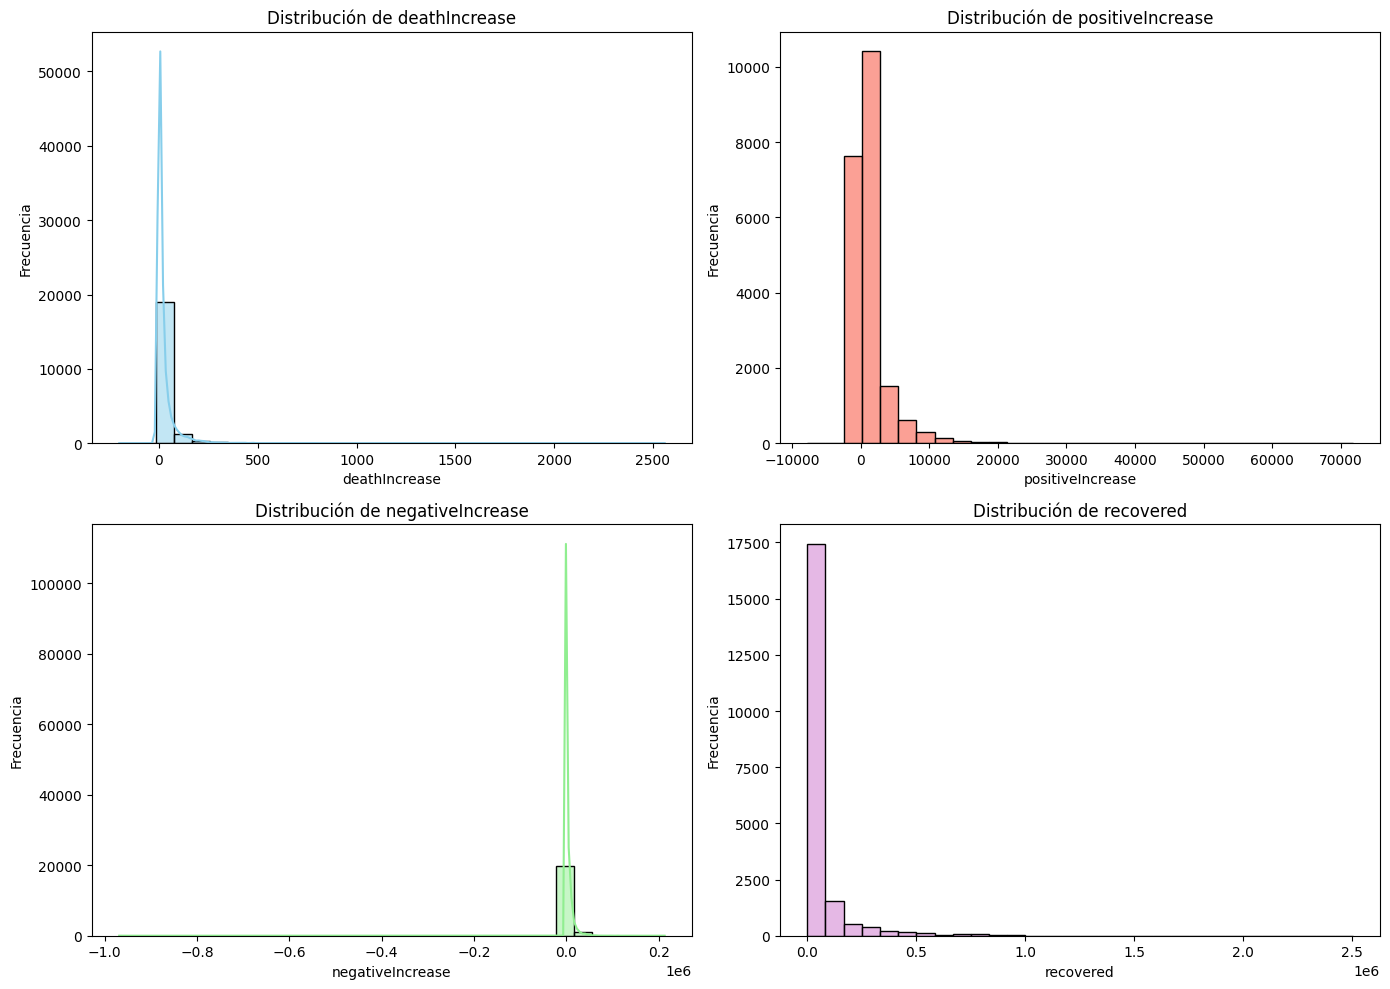

In [75]:
fig, axes = plt.subplots(2, 2, figsize=(14,10))
axes = axes.flatten()

# Loan Amount
sns.histplot(df_resumen['deathIncrease'], bins=30, kde=True, color='skyblue', ax=axes[0])
axes[0].set_title('Distribución de deathIncrease')
axes[0].set_xlabel('deathIncrease')
axes[0].set_ylabel('Frecuencia')

# Funded Amount
sns.histplot(df_resumen['positiveIncrease'], bins=30, kde=False, color='salmon', ax=axes[1])
axes[1].set_title('Distribución de positiveIncrease')
axes[1].set_xlabel('positiveIncrease')
axes[1].set_ylabel('Frecuencia')

# Term in Months
sns.histplot(df_resumen['negativeIncrease'], bins=30, kde=True, color='lightgreen', ax=axes[2])
axes[2].set_title('Distribución de negativeIncrease')
axes[2].set_xlabel('negativeIncrease')
axes[2].set_ylabel('Frecuencia')

# Lender Count
sns.histplot(df_resumen['recovered'], bins=30, kde=False, color='plum', ax=axes[3])
axes[3].set_title('Distribución de recovered')
axes[3].set_xlabel('recovered')
axes[3].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

# 💡 Gráfico de barras:

- Para datos discretos como estados y nivel de riqueza

Index(['California', 'Texas', 'Nueva York', 'Florida', 'Pensilvania',
       'Nueva Jersey', 'Illinois', 'Georgia', 'Ohio', 'Michigan'],
      dtype='string', name='stateName')
[54124 44451 39029 32266 24349 23574 23014 17906 17656 16658]


/tmp/ipython-input-1494701861.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_totals.index, y=state_totals.values, palette='pastel')


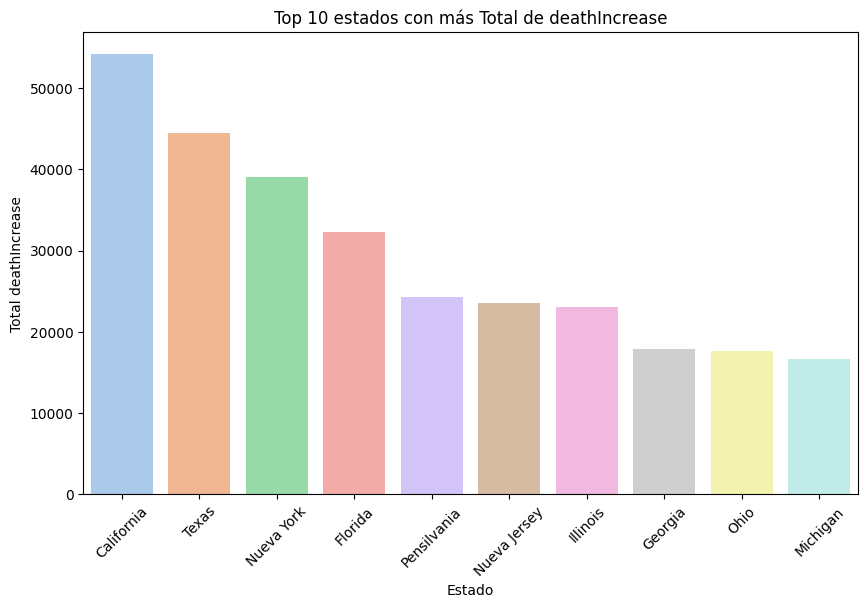

In [77]:
state_totals = df_resumen.groupby('stateName')['deathIncrease'].sum().sort_values(ascending=False).head(10)

print(state_totals.index)
print(state_totals.values)

plt.figure(figsize=(10,6))
sns.barplot(x=state_totals.index, y=state_totals.values, palette='pastel')
plt.title("Top 10 estados con más Total de deathIncrease")
plt.xlabel("Estado")
plt.ylabel("Total deathIncrease")
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=45)
plt.show()

Index(['Samoa Americana', 'Islas Marianas', 'Islas Virgenes', 'Guam',
       'Vermont', 'Alaska', 'Hawái', 'Wyoming', 'Maine', 'Columbia'],
      dtype='string', name='stateName')
[   0    2   25  133  208  305  445  682  706 1030]


/tmp/ipython-input-3319249714.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_totals.index, y=state_totals.values, palette='pastel')


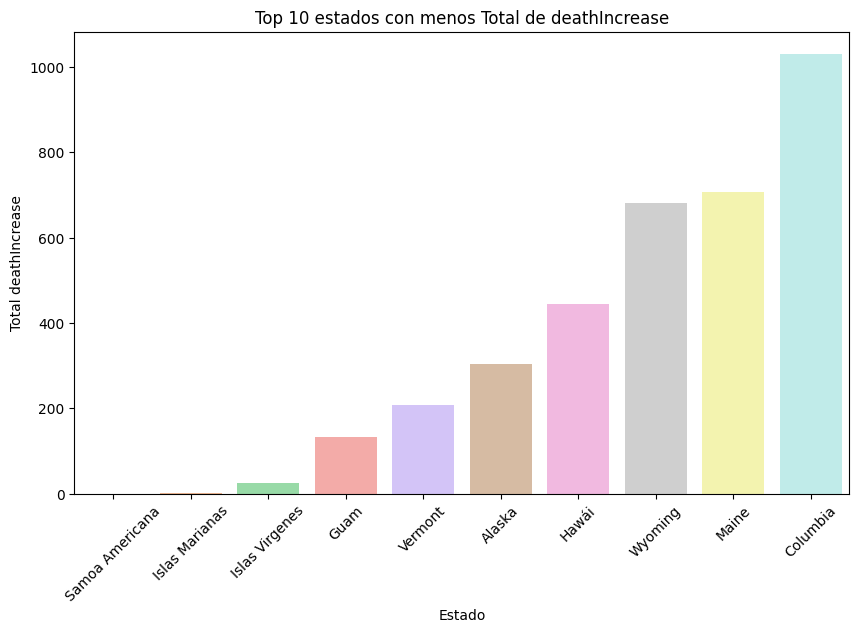

In [78]:
state_totals = df_resumen.groupby('stateName')['deathIncrease'].sum().sort_values(ascending=True).head(10)

print(state_totals.index)
print(state_totals.values)

plt.figure(figsize=(10,6))
sns.barplot(x=state_totals.index, y=state_totals.values, palette='pastel')
plt.title("Top 10 estados con menos Total de deathIncrease")
plt.xlabel("Estado")
plt.ylabel("Total deathIncrease")
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=45)
plt.show()

Index(['Medio', 'Rico', 'Pobre'], dtype='string', name='stateLevel')
[275882 180944  58325]


/tmp/ipython-input-3945740306.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_level_totals.index, y=state_level_totals.values, palette='pastel')


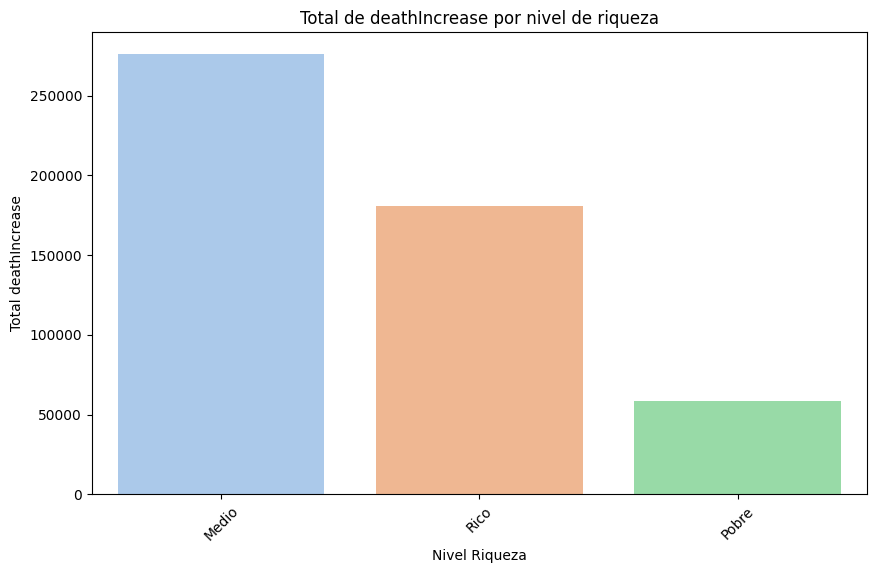

In [80]:
state_level_totals = df_resumen.groupby('stateLevel')['deathIncrease'].sum().sort_values(ascending=False)

print(state_level_totals.index)
print(state_level_totals.values)

plt.figure(figsize=(10,6))
sns.barplot(x=state_level_totals.index, y=state_level_totals.values, palette='pastel')
plt.title("Total de deathIncrease por nivel de riqueza")
plt.xlabel("Nivel Riqueza")
plt.ylabel("Total deathIncrease")
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=45)
plt.show()

Index(['Medio', 'Rico', 'Pobre'], dtype='string', name='stateLevel')
[143124979  98131285  28082187]


/tmp/ipython-input-2371430505.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_level_totals.index, y=state_level_totals.values, palette='pastel')


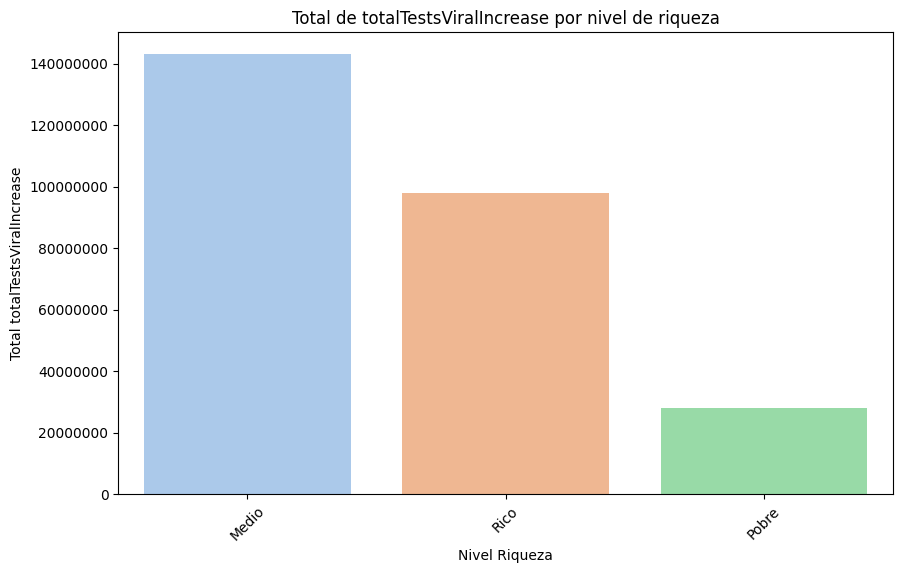

In [84]:
state_level_totals = df_resumen.groupby('stateLevel')['totalTestsViralIncrease'].sum().sort_values(ascending=False)

print(state_level_totals.index)
print(state_level_totals.values)

plt.figure(figsize=(10,6))
sns.barplot(x=state_level_totals.index, y=state_level_totals.values, palette='pastel')
plt.title("Total de totalTestsViralIncrease por nivel de riqueza")
plt.xlabel("Nivel Riqueza")
plt.ylabel("Total totalTestsViralIncrease")
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=45)
plt.show()

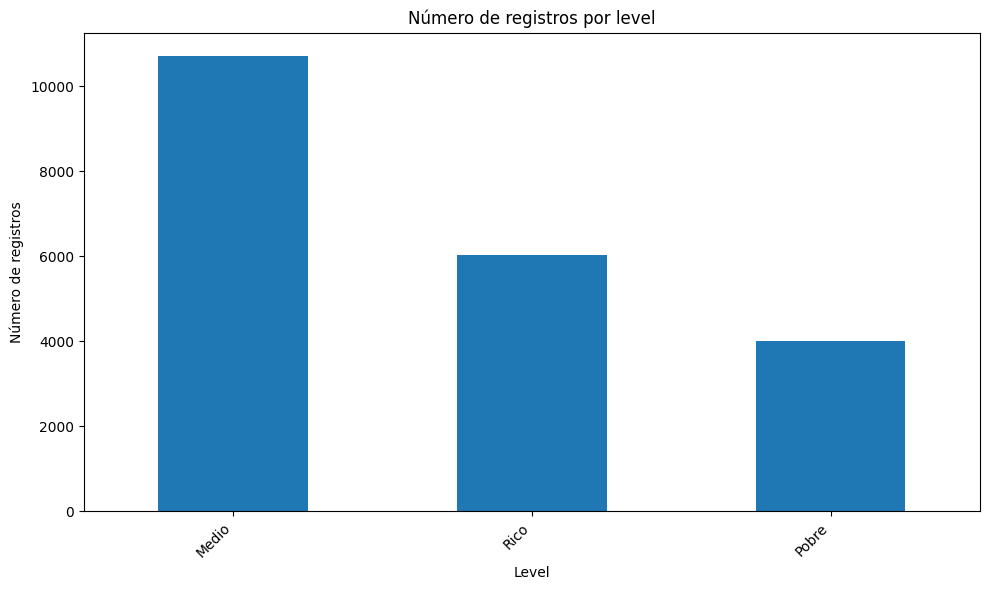

In [81]:
count_by_level = df_resumen['stateLevel'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(10,6))
count_by_level.plot(kind='bar')
plt.title('Número de registros por level')
plt.xlabel('Level')
plt.ylabel('Número de registros')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

/tmp/ipython-input-2071302584.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='stateLevel', y='deathIncrease', data=agg, palette='viridis')


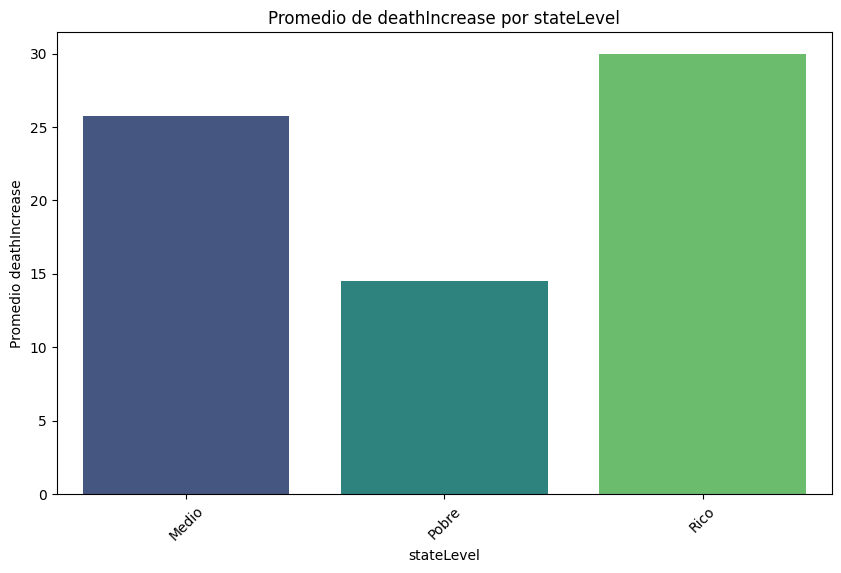

In [83]:
# Agrupar por stateLevel y calcular promedio de death
agg = df_resumen.groupby('stateLevel')['deathIncrease'].mean().reset_index()

# Gráfico de barras
plt.figure(figsize=(10,6))
sns.barplot(x='stateLevel', y='deathIncrease', data=agg, palette='viridis')
plt.title("Promedio de deathIncrease por stateLevel")
plt.xlabel("stateLevel")
plt.ylabel("Promedio deathIncrease")
plt.xticks(rotation=45)
plt.show()

# 💡 Gráfico de líneas:

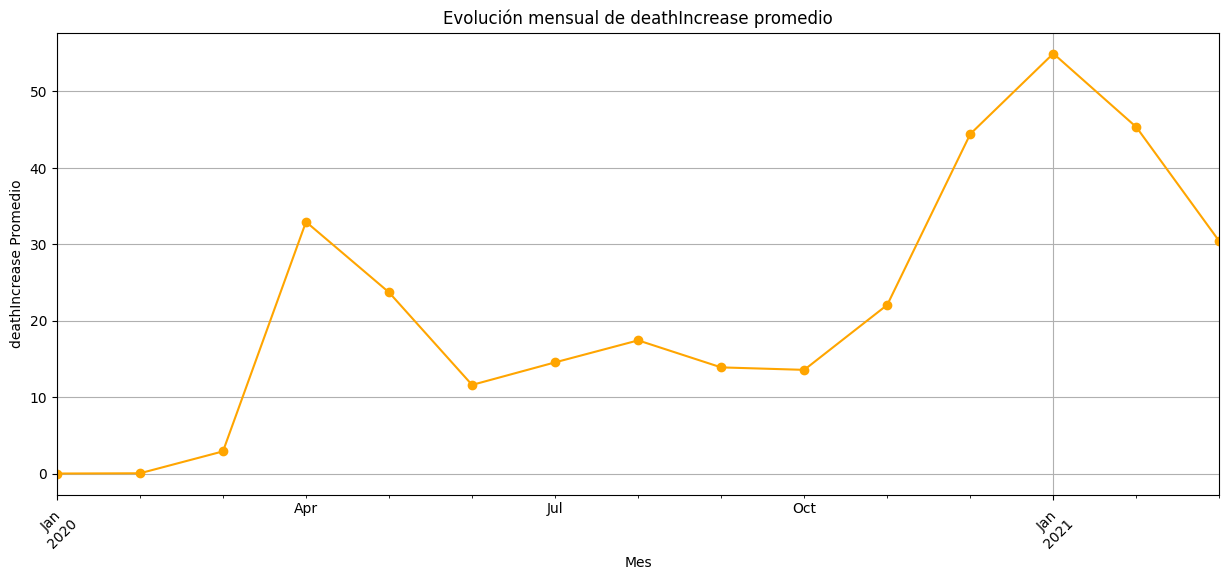

In [86]:
# Tendencia estacional de deathIncrease
df_resumen['mes'] = df_resumen['date'].dt.to_period('M')
monthly_avg = df_resumen.groupby('mes')['deathIncrease'].mean()

plt.figure(figsize=(15,6))
monthly_avg.plot(marker='o', color='orange')
plt.title("Evolución mensual de deathIncrease promedio")
plt.xlabel("Mes")
plt.ylabel("deathIncrease Promedio")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

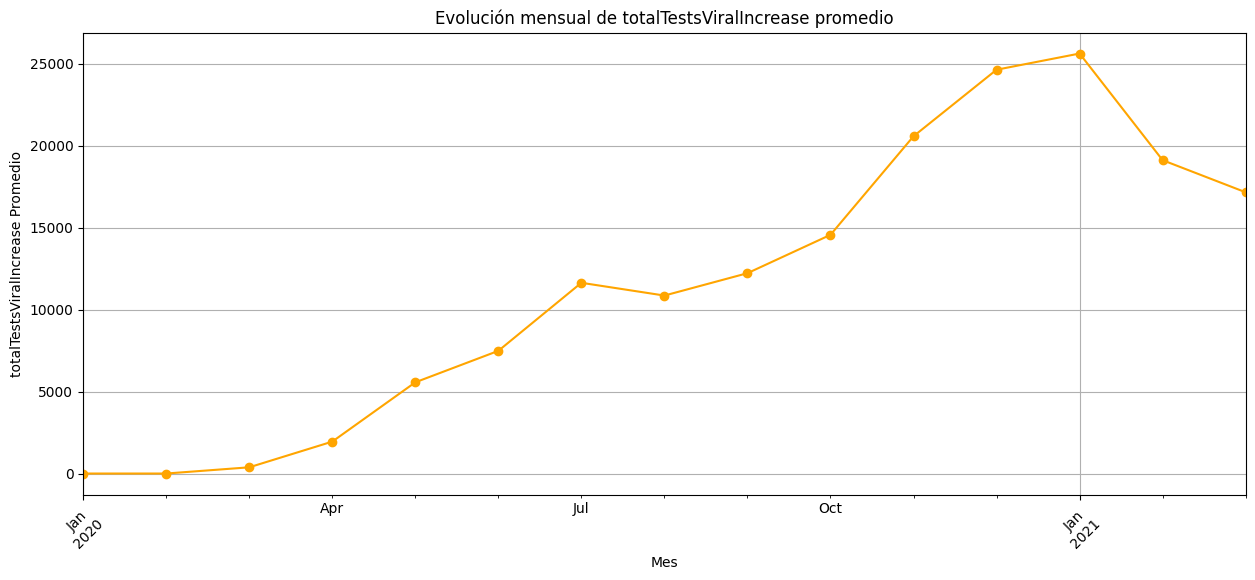

In [ ]:
# Tendencia estacional de totalTestsViralIncrease
df_resumen['mes'] = df_resumen['date'].dt.to_period('M')
monthly_avg = df_resumen.groupby('mes')['totalTestsViralIncrease'].mean()

plt.figure(figsize=(15,6))
monthly_avg.plot(marker='o', color='orange')
plt.title("Evolución mensual de totalTestsViralIncrease promedio")
plt.xlabel("Mes")
plt.ylabel("totalTestsViralIncrease Promedio")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

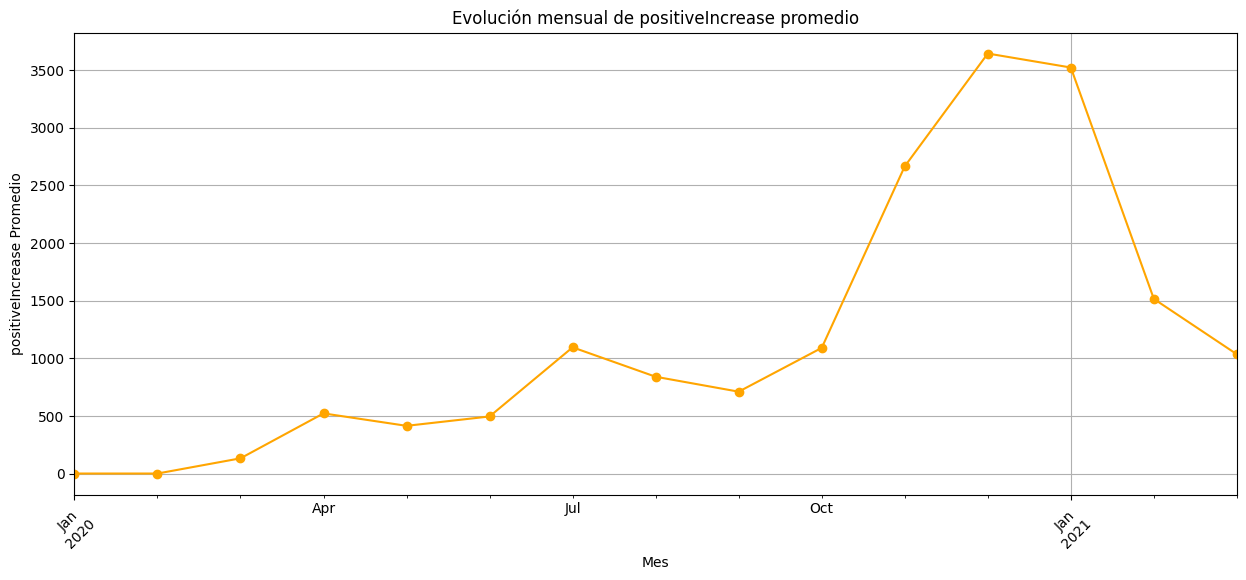

In [88]:
# Tendencia estacional de positiveIncrease
df_resumen['mes'] = df_resumen['date'].dt.to_period('M')
monthly_avg = df_resumen.groupby('mes')['positiveIncrease'].mean()

plt.figure(figsize=(15,6))
monthly_avg.plot(marker='o', color='orange')
plt.title("Evolución mensual de positiveIncrease promedio")
plt.xlabel("Mes")
plt.ylabel("positiveIncrease Promedio")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

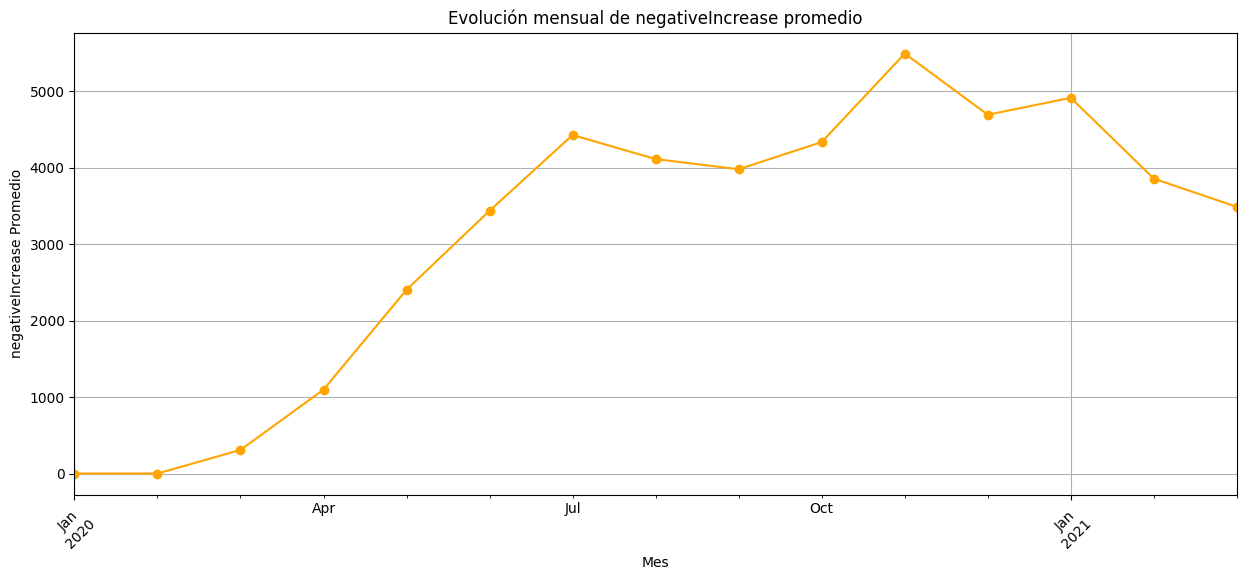

In [89]:
# Tendencia estacional de negativeIncrease
df_resumen['mes'] = df_resumen['date'].dt.to_period('M')
monthly_avg = df_resumen.groupby('mes')['negativeIncrease'].mean()

plt.figure(figsize=(15,6))
monthly_avg.plot(marker='o', color='orange')
plt.title("Evolución mensual de negativeIncrease promedio")
plt.xlabel("Mes")
plt.ylabel("negativeIncrease Promedio")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# 💡 Pie chart

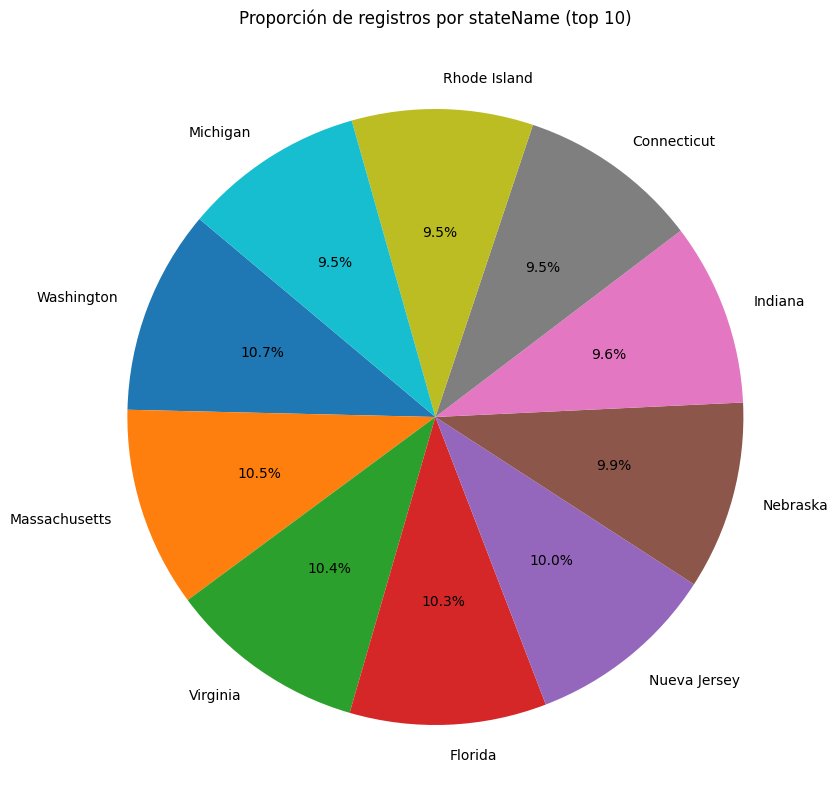

In [93]:
top_states = df_resumen['stateName'].value_counts().nlargest(10)
plt.figure(figsize=(10,10))
plt.pie(top_states, labels=top_states.index, autopct='%1.1f%%', startangle=140)
plt.title('Proporción de registros por stateName (top 10)')
plt.show()

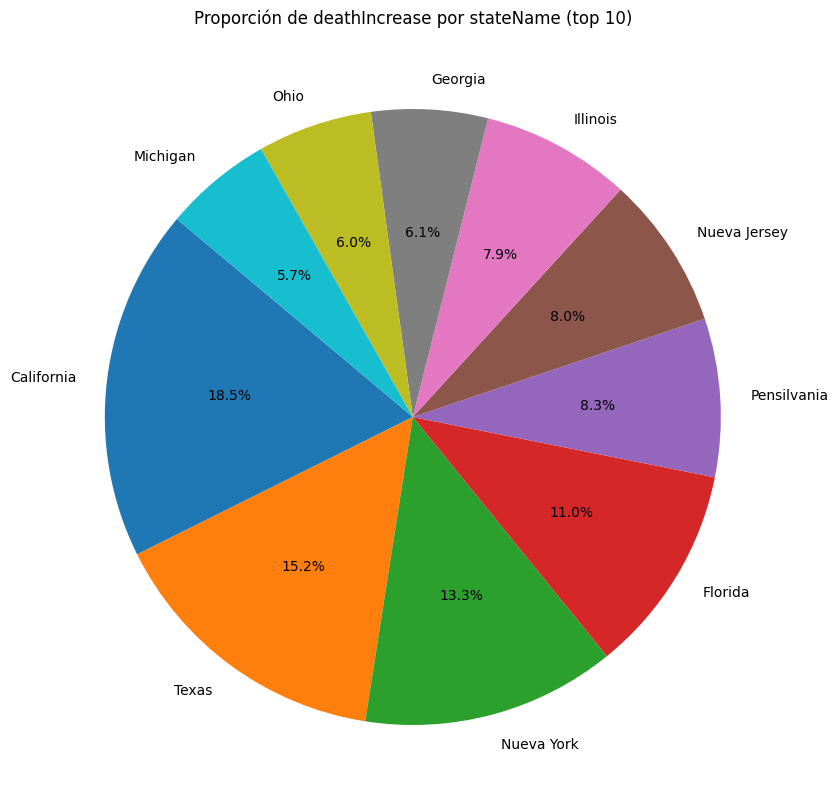

In [95]:
top_states = df_resumen.groupby('stateName')['deathIncrease'].sum().nlargest(10)
plt.figure(figsize=(10,10))
plt.pie(top_states, labels=top_states.index, autopct='%1.1f%%', startangle=140)
plt.title('Proporción de deathIncrease por stateName (top 10)')
plt.show()

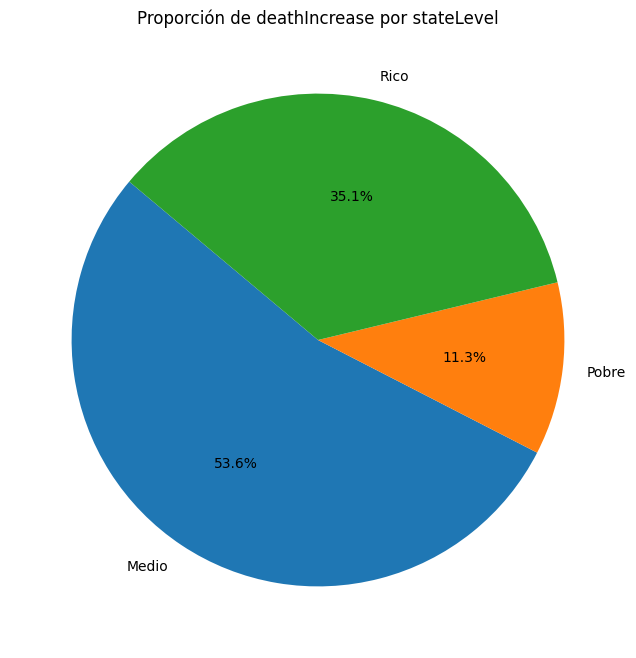

In [96]:
top_states = df_resumen.groupby('stateLevel')['deathIncrease'].sum()
plt.figure(figsize=(8,8))
plt.pie(top_states, labels=top_states.index, autopct='%1.1f%%', startangle=140)
plt.title('Proporción de deathIncrease por stateLevel')
plt.show()

In [106]:
total_death = df_resumen['deathIncrease'].sum()
print("Total de muertes en USA por covid19 -> ",total_death)

Total de muertes en USA por covid19 ->  515151


/tmp/ipython-input-2315026062.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='stateName', y='deathIncrease', data=agg, palette='viridis')


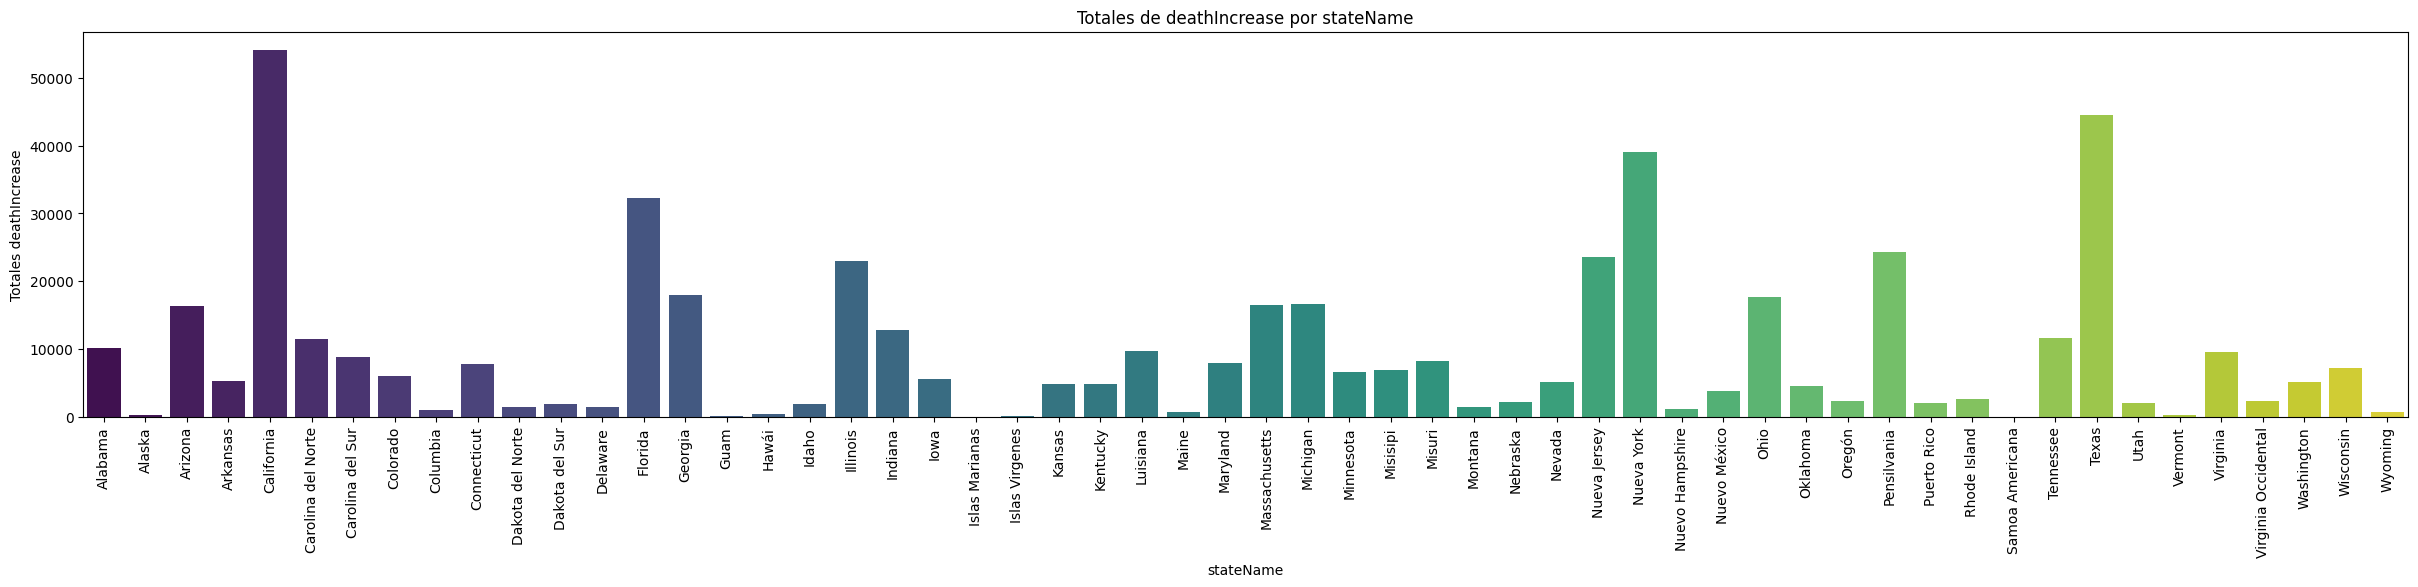

In [103]:
# Agrupar por stateName y calcular suma de deathIncrease
agg = df_resumen.groupby('stateName')['deathIncrease'].sum().reset_index()

# Gráfico de barras
plt.figure(figsize=(30,5))
sns.barplot(x='stateName', y='deathIncrease', data=agg, palette='viridis')
plt.title("Totales de deathIncrease por stateName")
plt.xlabel("stateName")
plt.ylabel("Totales deathIncrease")
plt.xticks(rotation=90)
plt.show()

/tmp/ipython-input-3177137325.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='stateName', y='totalTestsViralIncrease', data=agg, palette='viridis')


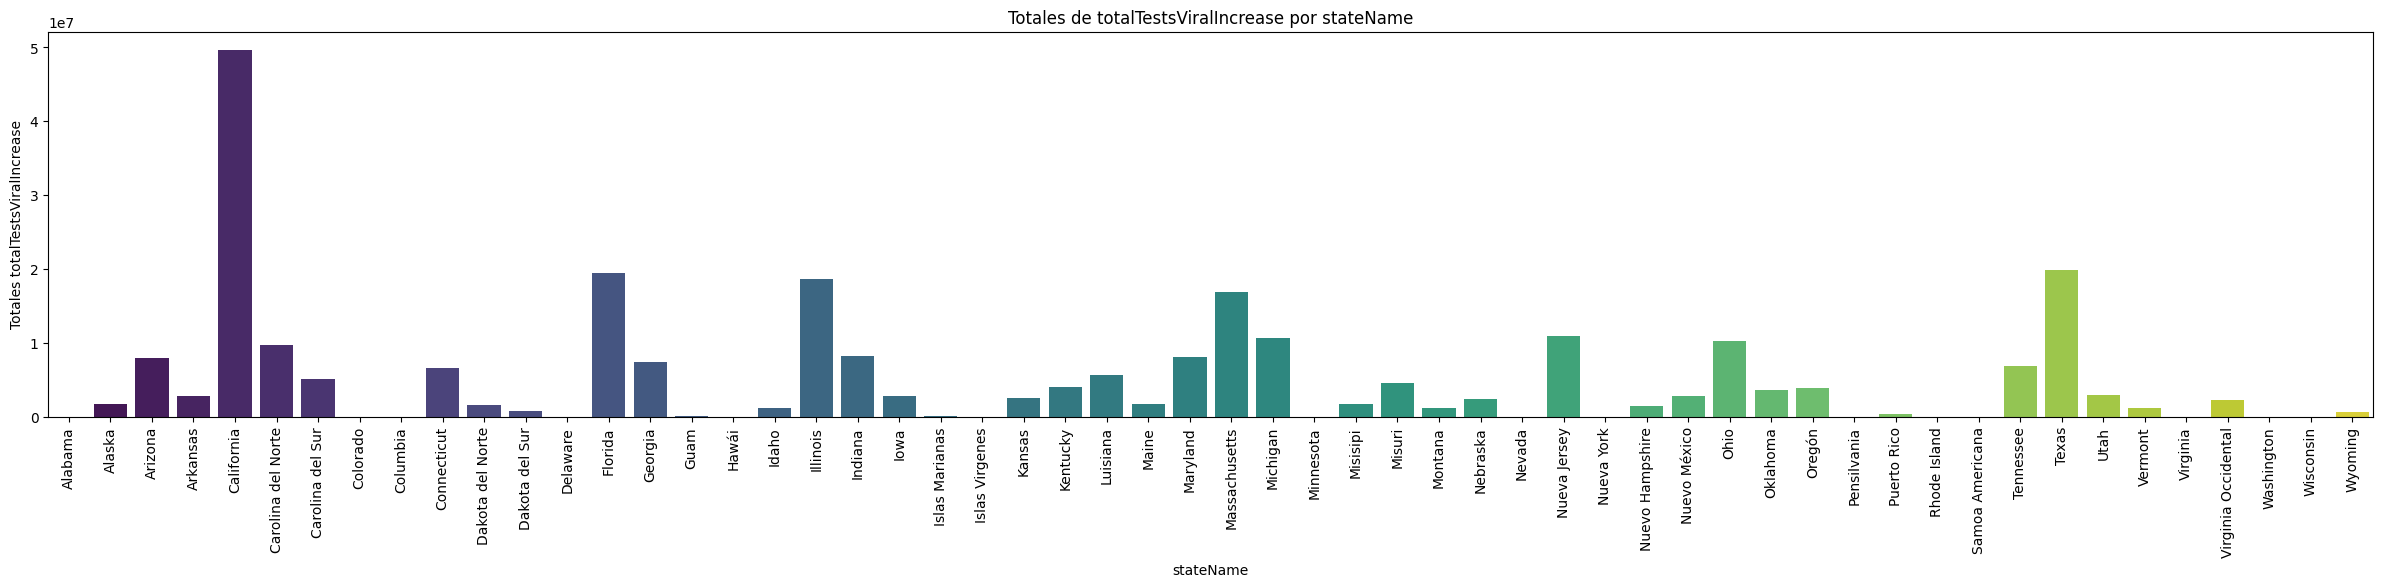

In [102]:
# Agrupar por stateName y calcular suma de totalTestsViralIncrease
agg = df_resumen.groupby('stateName')['totalTestsViralIncrease'].sum().reset_index()

# Gráfico de barras
plt.figure(figsize=(30,5))
sns.barplot(x='stateName', y='totalTestsViralIncrease', data=agg, palette='viridis')
plt.title("Totales de totalTestsViralIncrease por stateName")
plt.xlabel("stateName")
plt.ylabel("Totales totalTestsViralIncrease")
plt.xticks(rotation=90)
plt.show()

/tmp/ipython-input-103461925.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='stateLevel', y='deathIncrease', data=agg, palette='viridis')


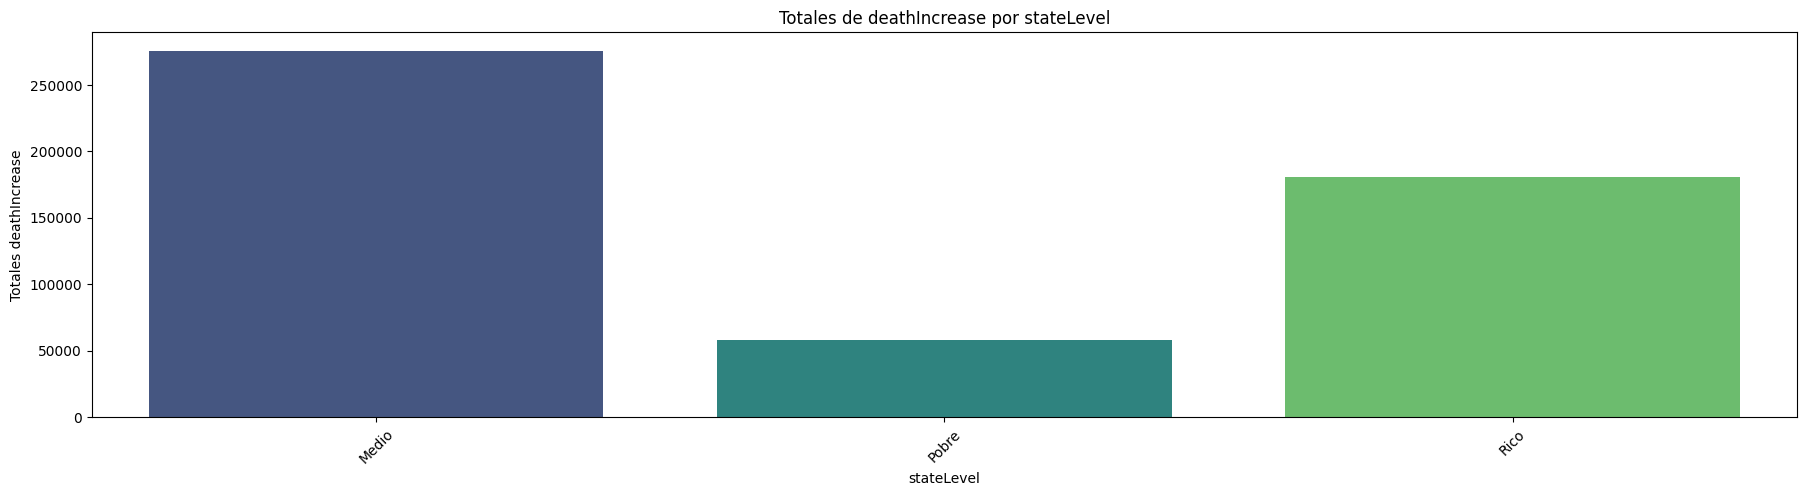

In [107]:
# Agrupar por stateLevel y calcular suma de deathIncrease
agg = df_resumen.groupby('stateLevel')['deathIncrease'].sum().reset_index()

# Gráfico de barras
plt.figure(figsize=(22,5))
sns.barplot(x='stateLevel', y='deathIncrease', data=agg, palette='viridis')
plt.title("Totales de deathIncrease por stateLevel")
plt.xlabel("stateLevel")
plt.ylabel("Totales deathIncrease")
plt.xticks(rotation=45)
plt.show()

/tmp/ipython-input-4006043894.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='stateLevel', y='totalTestsViralIncrease', data=agg, palette='viridis')


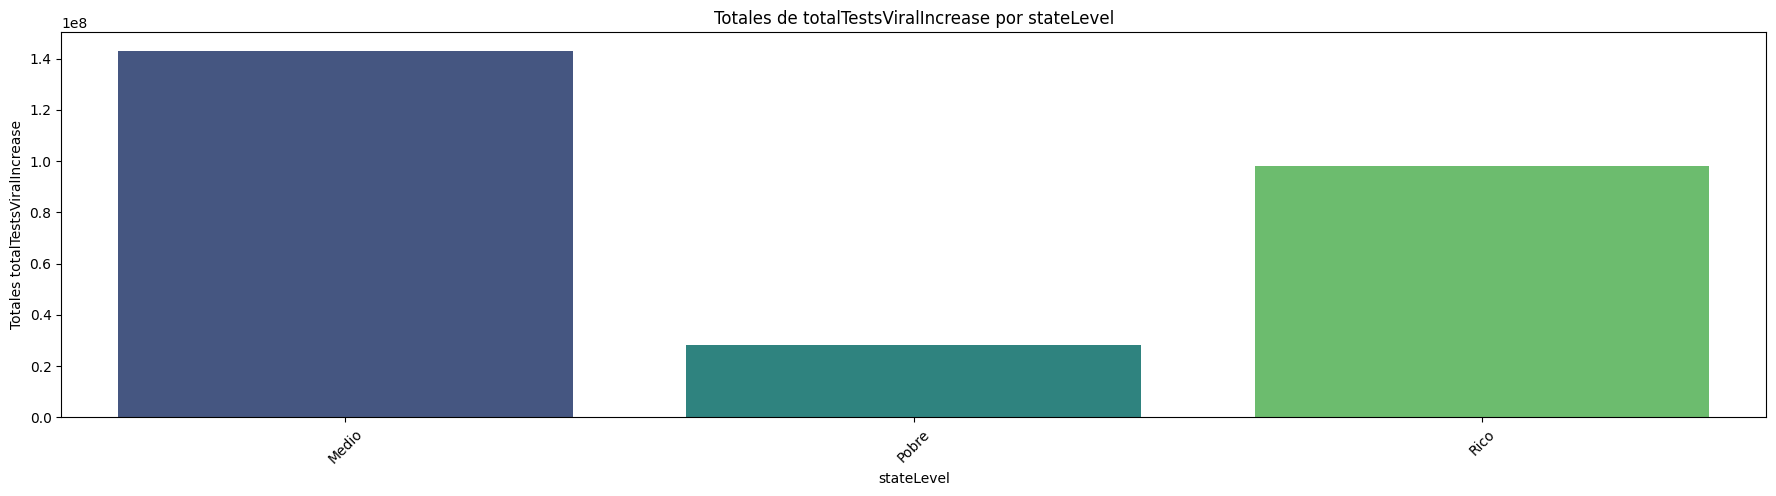

In [108]:
# Agrupar por stateLevel y calcular suma de totalTestsViralIncrease
agg = df_resumen.groupby('stateLevel')['totalTestsViralIncrease'].sum().reset_index()

# Gráfico de barras
plt.figure(figsize=(22,5))
sns.barplot(x='stateLevel', y='totalTestsViralIncrease', data=agg, palette='viridis')
plt.title("Totales de totalTestsViralIncrease por stateLevel")
plt.xlabel("stateLevel")
plt.ylabel("Totales totalTestsViralIncrease")
plt.xticks(rotation=45)
plt.show()

# Mapa de Muertes totales por estado

In [109]:
# PINTAR MAPA CON ESTADOS Y TOTALES DEATH
import plotly.express as px

In [110]:
# 1. Preparo los datos totales de deathIncrease por estado
tot_death = df_resumen.groupby(['state'])['deathIncrease'].sum().reset_index()
tot_death

,state,deathIncrease
0,AK,305
1,AL,10148
2,AR,5319
3,AS,0
4,AZ,16328
5,CA,54124
6,CO,5989
7,CT,7704
8,DC,1030
9,DE,1473


In [113]:
# 2. Crear el mapa coroplético
fig = px.choropleth(tot_death,
                    locations='state',
                    locationmode="USA-states", # Reconoce códigos de estados
                    color='deathIncrease',             # Columna para los colores
                    scope="usa",               # Enfocar solo en EE.UU.
                    color_continuous_scale="Viridis", # Paleta de colores
                    title='Mapa de Estados USA'
                   )

# 3. Mostrar el mapa
fig.show()